# MT2TE and Other Program Node Change

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set plotting style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.titleweight'] = 'bold'

# Define algorithm colors and patterns
ALGORITHM_STYLES = {
    'EVRPBSS': {'color': '#1f77b4', 'pattern': '///', 'label': 'EVRPBSS'},  # Blue with diagonal stripes
    'Ant Colony': {'color': '#ff7f0e', 'pattern': '///', 'label': 'Ant Colony'},  # Orange with diagonal stripes
    'Genetic Algorithm': {'color': '#2ca02c', 'pattern': '|||', 'label': 'Genetic Algorithm'},  # Green with vertical stripes
    'Clarke and Wright algorithm': {'color': '#d62728', 'pattern': '---', 'label': 'Clarke and Wright algorithm'}  # Red with horizontal stripes
}



In [79]:
def load_node_change_data(data_dir='data_HO/NodeChange'):
    """
    Load all CSV files from the NodeChange directory and combine them.
    
    Returns:
        DataFrame with columns: Nodes, Algorithm, and all metric columns
    """
    # Use current working directory (should be project root when notebook runs)
    # If that doesn't work, try going up one level from viz folder
    base_path = Path.cwd()
    
    # If we're in the viz folder, go up one level to project root
    if base_path.name == 'viz':
        base_path = base_path.parent
    
    # Resolve the data directory path
    data_path = base_path / data_dir
    
    print(f"Looking for data in: {data_path.absolute()}")
    
    # Map file names to algorithm labels
    file_mapping = {
        'H_H&O_NodeChange.csv': 'EVRPBSS',
        'AC_H&O_NodeChange.csv': 'Ant Colony',
        'GA_H&O_NodeChange.csv': 'Genetic Algorithm',
        'CW_H&O_NodeChange.csv': 'Clarke and Wright algorithm'
    }
    
    all_data = []
    
    for filename, algorithm in file_mapping.items():
        filepath = data_path / filename
        if filepath.exists():
            df = pd.read_csv(filepath)
            df['Algorithm'] = algorithm
            all_data.append(df)
            print(f"✓ Loaded {filename}")
        else:
            print(f"✗ Not found: {filepath}")
    
    if not all_data:
        raise ValueError(f"No data files found! Checked path: {data_path.absolute()}\n"
                        f"Current working directory: {Path.cwd().absolute()}")
    
    # Combine all dataframes
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Sort by Nodes and Algorithm for consistent ordering
    combined_df = combined_df.sort_values(['Nodes', 'Algorithm'])
    
    return combined_df

# Load the data
df = load_node_change_data()
print("\n" + "="*50)
print("Data loaded successfully!")
print("="*50)
print(f"\nShape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nAlgorithms: {df['Algorithm'].unique()}")
print(f"\nNode counts: {sorted(df['Nodes'].unique())}")
print(f"\nFirst few rows:")
df.head()



Looking for data in: c:\Users\ranji\Documents\GitHub\research-helper\data_HO\NodeChange
✓ Loaded H_H&O_NodeChange.csv
✓ Loaded AC_H&O_NodeChange.csv
✓ Loaded GA_H&O_NodeChange.csv
✓ Loaded CW_H&O_NodeChange.csv

Data loaded successfully!

Shape: (16, 7)

Columns: ['Nodes', 'Total Travel Time', 'Total Energy Consumed', 'Total Distance Covered', 'Run Time', 'Total Module Swapped', 'Algorithm']

Algorithms: ['Ant Colony' 'Clarke and Wright algorithm' 'EVRPBSS' 'Genetic Algorithm']

Node counts: [np.int64(50), np.int64(100), np.int64(150), np.int64(200)]

First few rows:


,Nodes,Total Travel Time,Total Energy Consumed,Total Distance Covered,Run Time,Total Module Swapped,Algorithm
4,50,322.45,28.987,217.66,3.729,1,Ant Colony
12,50,304.55,27.728,210.76,0.479,1,Clarke and Wright algorithm
0,50,333.79,28.875,226.00,0.088,1,EVRPBSS
8,50,265.81,25.174,185.50,56.395,0,Genetic Algorithm
5,100,1020.01,85.816,674.60,11.113,3,Ant Colony


In [80]:
def create_line_chart_with_inset(df, metric_column, title=None, ylabel=None):
    """
    Create a line chart with an inset showing all four algorithms in the main plot
    and a zoomed inset focusing on the three fast algorithms (excluding Genetic Algorithm).
    
    Parameters:
    -----------
    df : DataFrame
        Data with columns: Nodes, Algorithm, and metric_column
    metric_column : str
        Name of the metric column to visualize
    title : str, optional
        Chart title (default: "{metric} by Number of Nodes")
    ylabel : str, optional
        Y-axis label (default: metric_column)
    """
    # Prepare data for plotting
    nodes = sorted(df['Nodes'].unique())
    all_algorithms = ['EVRPBSS', 'Ant Colony', 'Genetic Algorithm', 'Clarke and Wright algorithm']
    fast_algorithms = ['EVRPBSS', 'Ant Colony', 'Clarke and Wright algorithm']
    
    # Define line styles for each algorithm
    line_styles = {
        'EVRPBSS': {'color': '#2ca02c', 'marker': 'o', 'linestyle': '-', 'label': 'EVRPBSS'},  # Green circles, solid
        'Ant Colony': {'color': '#ff7f0e', 'marker': 's', 'linestyle': '--', 'label': 'Ant Colony'},  # Orange squares, dashed
        'Genetic Algorithm': {'color': '#1f77b4', 'marker': '^', 'linestyle': ':', 'label': 'Genetic Algorithm'},  # Blue triangles, dotted
        'Clarke and Wright algorithm': {'color': '#d62728', 'marker': 'D', 'linestyle': '--', 'label': 'Clarke and Wright algorithm'}  # Red diamonds, dashed
    }
    
    # Create main figure
    fig, ax_main = plt.subplots(figsize=(10, 6))
    
    # Plot all algorithms in main plot
    for alg in all_algorithms:
        values = []
        for node in nodes:
            value = df[(df['Nodes'] == node) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)
        
        style = line_styles[alg]
        ax_main.plot(nodes, values, 
                    color=style['color'],
                    marker=style['marker'],
                    linestyle=style['linestyle'],
                    label=style['label'],
                    linewidth=2,
                    markersize=8,
                    markeredgecolor='black',
                    markeredgewidth=0.5)
    
    # Customize main axes
    ax_main.set_xlabel('Number of Nodes', fontweight='bold')
    ax_main.set_ylabel(ylabel or metric_column, fontweight='bold')
    ax_main.set_title(title or f'{metric_column} by Number of Nodes', 
                     fontweight='bold', pad=20)
    ax_main.set_xticks(nodes)
    ax_main.legend(title='Algorithm', title_fontsize=11, fontsize=11, frameon=True, 
                  loc='upper left', bbox_to_anchor=(1.02, 1))
    ax_main.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax_main.set_axisbelow(True)
    ax_main.set_ylim(bottom=0)
    
    # Create inset axes (positioned in lower right corner with spacing from main plot)
    # [left, bottom, width, height] in figure coordinates (0 to 1)
    ax_inset = fig.add_axes([0.62, 0.20, 0.30, 0.30])  # Lower right corner with spacing from main plot
    
    # Plot only the three fast algorithms in inset
    for alg in fast_algorithms:
        values = []
        for node in nodes:
            value = df[(df['Nodes'] == node) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)
        
        style = line_styles[alg]
        ax_inset.plot(nodes, values, 
                      color=style['color'],
                      marker=style['marker'],
                      linestyle=style['linestyle'],
                      label=style['label'],
                      linewidth=2,
                      markersize=6,
                      markeredgecolor='black',
                      markeredgewidth=0.5)
    
    # Customize inset axes
    ax_inset.set_xlabel('Number of Nodes', fontweight='bold', fontsize=9)
    ax_inset.set_ylabel(ylabel or metric_column, fontweight='bold', fontsize=9)
    ax_inset.set_title('Zoomed View\n(Fast Algorithms)', fontweight='bold', fontsize=10, pad=10)
    ax_inset.set_xticks(nodes)
    ax_inset.tick_params(labelsize=8)
    ax_inset.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax_inset.set_axisbelow(True)
    ax_inset.set_ylim(bottom=0)
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend on the right
    
    return fig, ax_main



In [81]:
def create_line_chart(df, metric_column, title=None, ylabel=None):
    """
    Create a line chart for comparing algorithms over different node counts.
    Matches the reference image style for execution time visualization.
    
    Parameters:
    -----------
    df : DataFrame
        Data with columns: Nodes, Algorithm, and metric_column
    metric_column : str
        Name of the metric column to visualize
    title : str, optional
        Chart title (default: "{metric} by Number of Nodes")
    ylabel : str, optional
        Y-axis label (default: metric_column)
    """
    # Prepare data for plotting
    nodes = sorted(df['Nodes'].unique())
    algorithms = ['EVRPBSS', 'Ant Colony', 'Genetic Algorithm', 'Clarke and Wright algorithm']
    
    # Define line styles for each algorithm (matching reference image)
    line_styles = {
        'EVRPBSS': {'color': '#2ca02c', 'marker': 'o', 'linestyle': '-', 'label': 'EVRPBSS'},  # Green circles, solid
        'Ant Colony': {'color': '#ff7f0e', 'marker': 's', 'linestyle': '--', 'label': 'Ant Colony'},  # Orange squares, dashed
        'Genetic Algorithm': {'color': '#1f77b4', 'marker': '^', 'linestyle': ':', 'label': 'Genetic Algorithm'},  # Blue triangles, dotted
        'Clarke and Wright algorithm': {'color': '#d62728', 'marker': 'D', 'linestyle': '--', 'label': 'Clarke and Wright algorithm'}  # Red diamonds, dashed
    }
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot lines for each algorithm
    for alg in algorithms:
        values = []
        for node in nodes:
            value = df[(df['Nodes'] == node) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)
        
        style = line_styles[alg]
        ax.plot(nodes, values, 
               color=style['color'],
               marker=style['marker'],
               linestyle=style['linestyle'],
               label=style['label'],
               linewidth=2,
               markersize=8,
               markeredgecolor='black',
               markeredgewidth=0.5)
    
    # Customize axes
    ax.set_xlabel('Number of Nodes', fontweight='bold')
    ax.set_ylabel(ylabel or metric_column, fontweight='bold')
    ax.set_title(title or f'{metric_column} by Number of Nodes', 
                fontweight='bold', pad=20)
    ax.set_xticks(nodes)
    
    # Add legend
    ax.legend(title='Algorithm', title_fontsize=11, fontsize=11, frameon=True, 
              loc='upper left', bbox_to_anchor=(1.02, 1))
    
    # Add grid
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    
    # Set y-axis to start from 0
    ax.set_ylim(bottom=0)
    
    # Adjust layout to make room for legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend on the right
    
    return fig, ax



In [82]:
def create_grouped_bar_chart(df, metric_column, title=None, ylabel=None):
    """
    Create a grouped bar chart matching the reference image style.

    Tuned for 4 algorithms:
    - Wider figure
    - Wider bars (so 4-digit labels fit)
    - More spacing between bar groups
    """
    # Prepare data for plotting
    nodes = sorted(df['Nodes'].unique())
    algorithms = ['EVRPBSS', 'Ant Colony', 'Genetic Algorithm', 'Clarke and Wright algorithm']

    # Create figure (wider)
    fig, ax = plt.subplots(figsize=(14, 6))

    # Group spacing + bar width
    group_spacing = 1.25
    bar_width = 0.22

    # Set up bar positions
    x = np.arange(len(nodes)) * group_spacing
    offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * bar_width

    # Plot bars for each algorithm
    for i, alg in enumerate(algorithms):
        values = []
        for node in nodes:
            value = df[(df['Nodes'] == node) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)

        style = ALGORITHM_STYLES[alg]
        bar = ax.bar(
            x + offsets[i],
            values,
            bar_width,
            label=style['label'],
            color=style['color'],
            edgecolor='black',
            linewidth=0.5,
        )

        # Add pattern + value labels (small point-offset so labels sit above bars)
        for rect, val in zip(bar, values):
            rect.set_hatch(style['pattern'])

            # Format value - 1 decimal for small values, integer for large
            if val < 10:
                label_text = f'{val:.1f}'
            elif val < 100:
                label_text = f'{val:.1f}'
            else:
                label_text = f'{int(val)}'

            ax.annotate(
                label_text,
                (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                textcoords='offset points',
                xytext=(0, 3),
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='normal',
            )

    # Customize axes
    ax.set_xlabel('Total Number of Nodes', fontweight='bold')
    ax.set_ylabel(ylabel or metric_column, fontweight='bold')
    ax.set_title(title or f'{metric_column} vs Number of Nodes', fontweight='bold', pad=20)

    ax.set_xticks(x)
    ax.set_xticklabels(nodes)

    # Add a little horizontal padding so outer bars/labels don't clip
    if len(x) > 0:
        ax.set_xlim(x[0] - group_spacing * 0.6, x[-1] + group_spacing * 0.6)

    # Legend + grid
    ax.legend(title='Algorithm', title_fontsize=11, fontsize=11, frameon=True, loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)

    # Adjust layout to make room for legend
    plt.tight_layout(rect=[0, 0, 0.80, 1])

    return fig, ax



In [83]:
df

,Nodes,Total Travel Time,Total Energy Consumed,Total Distance Covered,Run Time,Total Module Swapped,Algorithm
4,50,322.45,28.987,217.66,3.729,1,Ant Colony
12,50,304.55,27.728,210.76,0.479,1,Clarke and Wright algorithm
0,50,333.79,28.875,226.00,0.088,1,EVRPBSS
8,50,265.81,25.174,185.50,56.395,0,Genetic Algorithm
5,100,1020.01,85.816,674.60,11.113,3,Ant Colony
13,100,686.86,57.547,449.93,2.202,3,Clarke and Wright algorithm
1,100,769.79,65.427,510.34,0.671,2,EVRPBSS
9,100,1404.52,109.281,901.11,235.840,2,Genetic Algorithm
6,150,1612.03,131.212,1042.60,16.729,5,Ant Colony
14,150,1170.71,97.636,761.54,5.282,5,Clarke and Wright algorithm


## (a) Total Travel Time

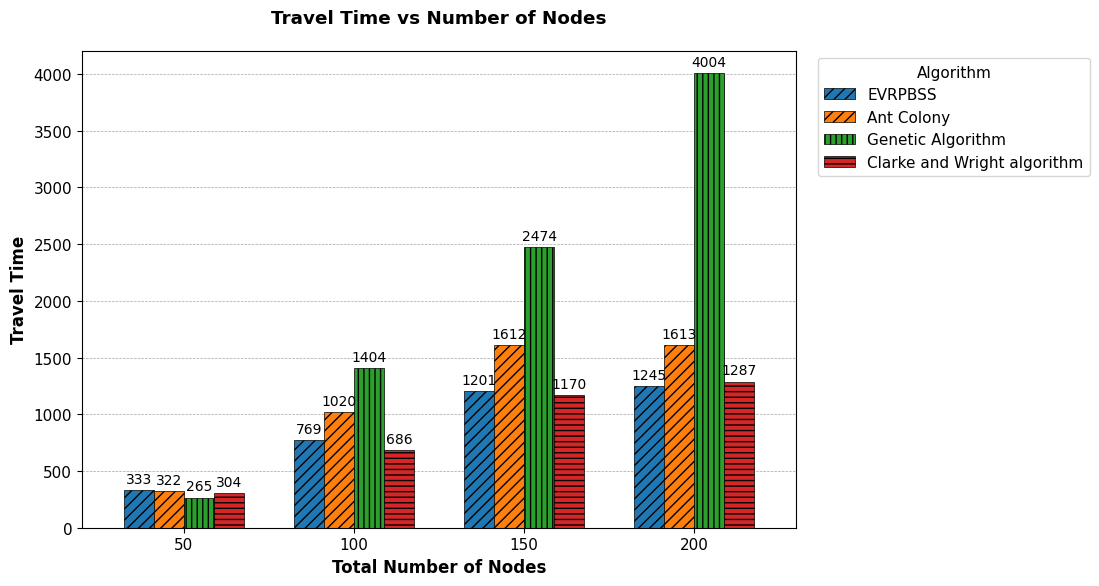

In [84]:
# Create Total Travel Time visualization
fig, ax = create_grouped_bar_chart(
    df, 
    'Total Travel Time',
    title='Travel Time vs Number of Nodes',
    ylabel='Travel Time'
)
plt.show()



## (b) Energy



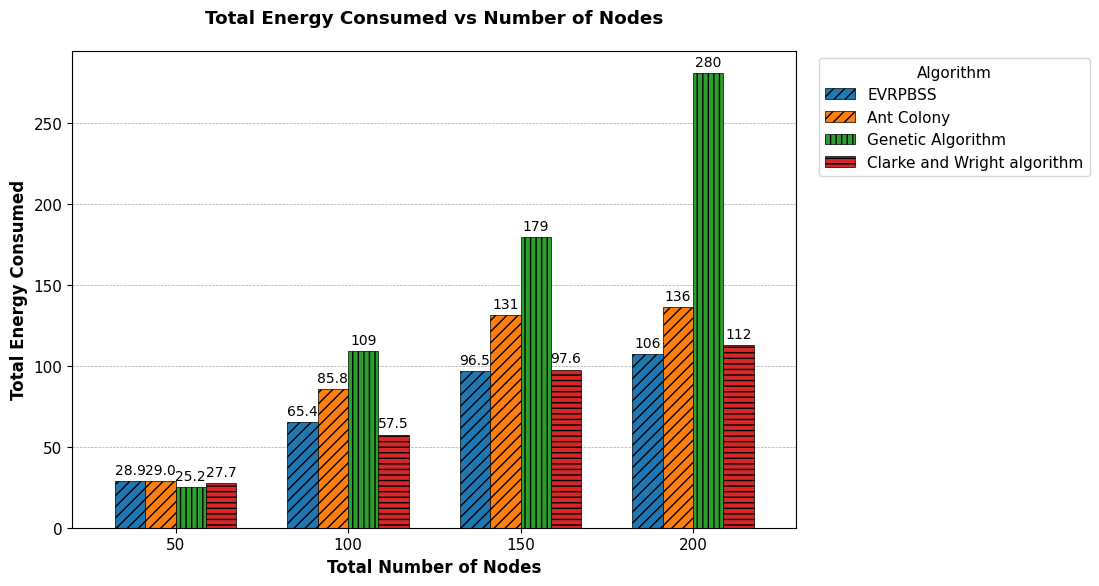

In [86]:
# Total Energy Consumed
fig, ax = create_grouped_bar_chart(
    df, 
    'Total Energy Consumed',
    title='Total Energy Consumed vs Number of Nodes',
    ylabel='Total Energy Consumed'
)
plt.show()



## (c) Distance

Line chart showing execution time trends across different node counts for all algorithms.



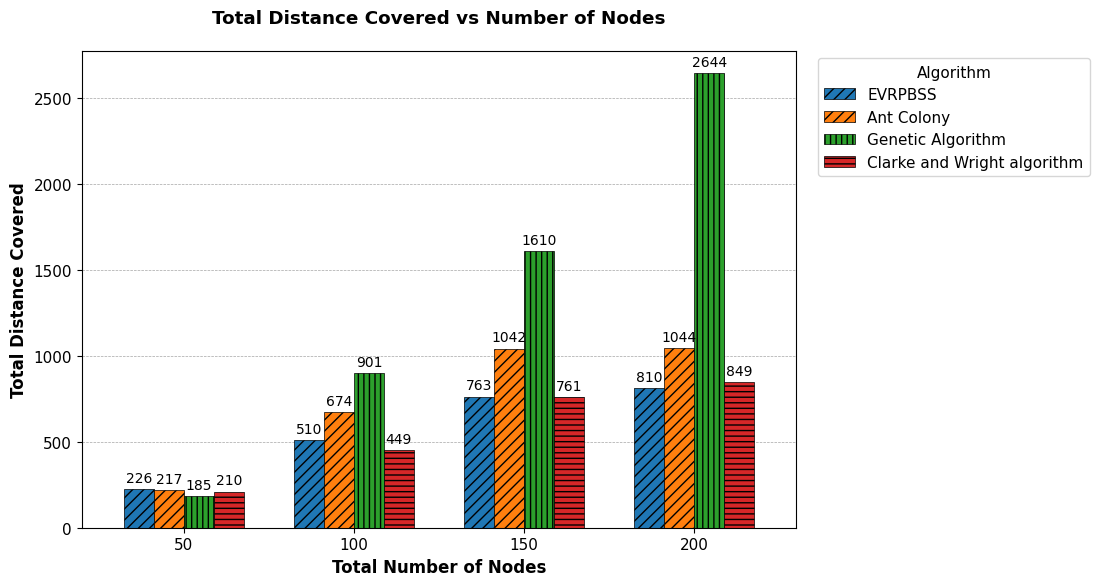

In [88]:
# Total Distance Covered
fig, ax = create_grouped_bar_chart(
    df, 
    'Total Distance Covered',
    title='Total Distance Covered vs Number of Nodes',
    ylabel='Total Distance Covered'
)
plt.show()



## (d) Execution Time

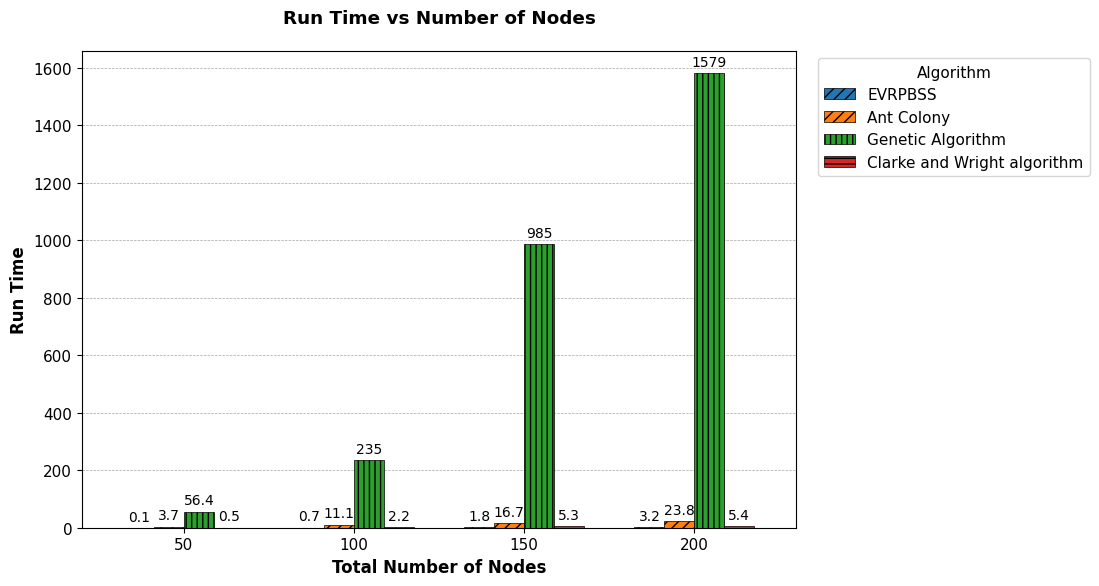

In [90]:
# Run Time
fig, ax = create_grouped_bar_chart(
    df, 
    'Run Time',
    title='Run Time vs Number of Nodes',
    ylabel='Run Time'
)
plt.show()



## (e) Total Module Swapped

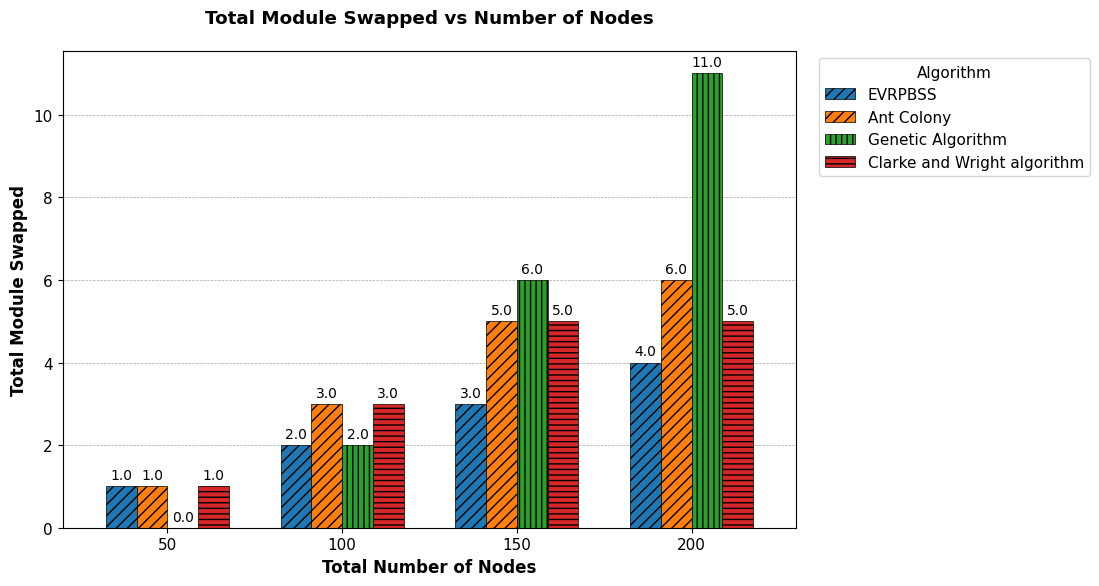

In [92]:

fig, ax = create_grouped_bar_chart(
    df, 
    'Total Module Swapped',
    title='Total Module Swapped vs Number of Nodes',
    ylabel='Total Module Swapped'
)
plt.show()



## (f) Execution Time

C:\Users\ranji\AppData\Local\Temp\ipykernel_20988\2838237770.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend on the right


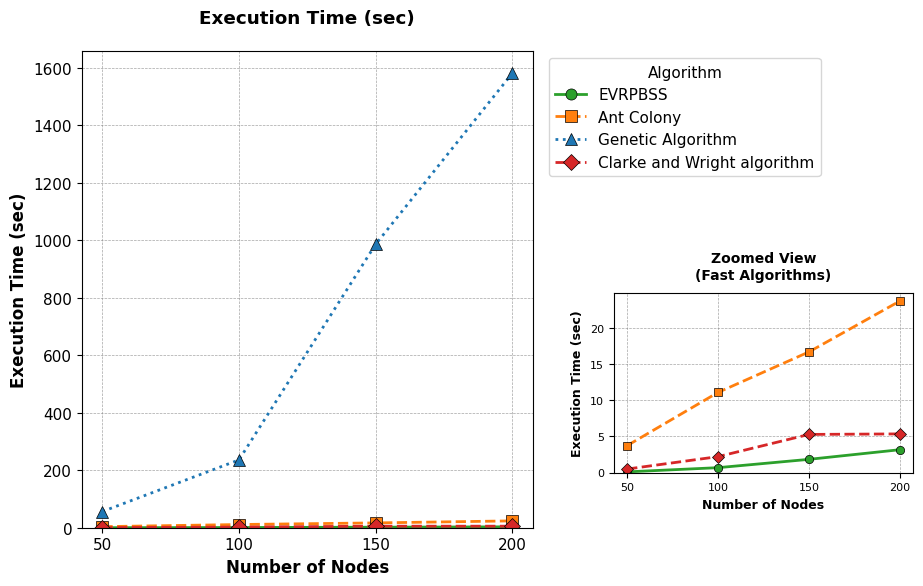

In [94]:
# Run Time (Execution Time) - Line Chart with Inset
# Main plot shows all four algorithms, with a zoomed inset focusing on the three fast algorithms
fig, ax = create_line_chart_with_inset(
    df, 
    'Run Time',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()

# MT2TE and Other Program Module Change

In [96]:
def create_grouped_bar_chart_generic(df, metric_column, x_axis_column, title=None, ylabel=None):
    """
    Generic grouped bar chart function that works with any x-axis column.

    Tuned for 4 algorithms:
    - Wider figure
    - Wider bars (so 4-digit labels fit)
    - More spacing between bar groups
    """
    # Prepare data for plotting
    # Handle Traffic Level special ordering
    if x_axis_column == 'Traffic Level':
        TRAFFIC_ORDER = {"Low": 1, "Mid": 2, "High": 3}
        unique_values = df[x_axis_column].unique()
        x_values = sorted(unique_values, key=lambda x: TRAFFIC_ORDER.get(x, 999))
    else:
        x_values = sorted(df[x_axis_column].unique())

    algorithms = ['EVRPBSS', 'Ant Colony', 'Genetic Algorithm', 'Clarke and Wright algorithm']

    # Create figure (wider)
    fig, ax = plt.subplots(figsize=(14, 6))

    # Group spacing + bar width
    group_spacing = 1.25
    bar_width = 0.22

    # Set up bar positions
    x = np.arange(len(x_values)) * group_spacing
    offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * bar_width

    # Plot bars for each algorithm
    for i, alg in enumerate(algorithms):
        values = []
        for x_val in x_values:
            value = df[(df[x_axis_column] == x_val) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)

        style = ALGORITHM_STYLES[alg]
        bar = ax.bar(
            x + offsets[i],
            values,
            bar_width,
            label=style['label'],
            color=style['color'],
            edgecolor='black',
            linewidth=0.5,
        )

        # Pattern + value labels (point-offset so labels sit above bars)
        for rect, val in zip(bar, values):
            rect.set_hatch(style['pattern'])

            # Format value - 1 decimal for small values, integer for large
            if val < 10:
                label_text = f'{val:.1f}'
            elif val < 100:
                label_text = f'{val:.1f}'
            else:
                label_text = f'{int(val)}'

            ax.annotate(
                label_text,
                (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                textcoords='offset points',
                xytext=(0, 3),
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='normal',
            )

    # Customize axes
    ax.set_xlabel(x_axis_column, fontweight='bold')
    ax.set_ylabel(ylabel or metric_column, fontweight='bold')
    ax.set_title(title or f'{metric_column} vs {x_axis_column}', fontweight='bold', pad=20)
    ax.set_xticks(x)

    # Handle Traffic Level special formatting with range values
    if x_axis_column == 'Traffic Level':
        traffic_labels = {
            'Low': '0.87-1.0\nLow',
            'Mid': '0.73-0.87\nMid',
            'High': '0.6-0.73\nHigh'
        }
        x_labels = [traffic_labels.get(val, val) for val in x_values]
    else:
        x_labels = x_values

    ax.set_xticklabels(x_labels)

    # Add a little horizontal padding so outer bars/labels don't clip
    if len(x) > 0:
        ax.set_xlim(x[0] - group_spacing * 0.6, x[-1] + group_spacing * 0.6)

    ax.legend(title='Algorithm', title_fontsize=11, fontsize=11, frameon=True, loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)
    plt.tight_layout(rect=[0, 0, 0.80, 1])

    return fig, ax



In [98]:
def create_grouped_bar_chart_generic(df, metric_column, x_axis_column, title=None, ylabel=None):
    """
    Generic grouped bar chart function that works with any x-axis column.

    Tuned for 4 algorithms:
    - Wider figure
    - Wider bars (so 4-digit labels fit)
    - More spacing between bar groups
    """
    # Prepare data for plotting
    # Handle Traffic Level special ordering
    if x_axis_column == 'Traffic Level':
        TRAFFIC_ORDER = {"Low": 1, "Mid": 2, "High": 3}
        unique_values = df[x_axis_column].unique()
        x_values = sorted(unique_values, key=lambda x: TRAFFIC_ORDER.get(x, 999))
    else:
        x_values = sorted(df[x_axis_column].unique())

    algorithms = ['EVRPBSS', 'Ant Colony', 'Genetic Algorithm', 'Clarke and Wright algorithm']

    # Create figure (wider)
    fig, ax = plt.subplots(figsize=(14, 6))

    # Group spacing + bar width
    group_spacing = 1.25
    bar_width = 0.22

    # Set up bar positions
    x = np.arange(len(x_values)) * group_spacing
    offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * bar_width

    # Plot bars for each algorithm
    for i, alg in enumerate(algorithms):
        values = []
        for x_val in x_values:
            value = df[(df[x_axis_column] == x_val) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)

        style = ALGORITHM_STYLES[alg]
        bar = ax.bar(
            x + offsets[i],
            values,
            bar_width,
            label=style['label'],
            color=style['color'],
            edgecolor='black',
            linewidth=0.5,
        )

        # Pattern + value labels (point-offset so labels sit above bars)
        for rect, val in zip(bar, values):
            rect.set_hatch(style['pattern'])

            # Format value - 1 decimal for small values, integer for large
            if val < 10:
                label_text = f'{val:.1f}'
            elif val < 100:
                label_text = f'{val:.1f}'
            else:
                label_text = f'{int(val)}'

            ax.annotate(
                label_text,
                (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                textcoords='offset points',
                xytext=(0, 3),
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='normal',
            )

    # Customize axes
    ax.set_xlabel(x_axis_column, fontweight='bold')
    ax.set_ylabel(ylabel or metric_column, fontweight='bold')
    ax.set_title(title or f'{metric_column} vs {x_axis_column}', fontweight='bold', pad=20)
    ax.set_xticks(x)

    # Handle Traffic Level special formatting with range values
    if x_axis_column == 'Traffic Level':
        traffic_labels = {
            'Low': '0.87-1.0\nLow',
            'Mid': '0.73-0.87\nMid',
            'High': '0.6-0.73\nHigh'
        }
        x_labels = [traffic_labels.get(val, val) for val in x_values]
    else:
        x_labels = x_values

    ax.set_xticklabels(x_labels)

    # Add a little horizontal padding so outer bars/labels don't clip
    if len(x) > 0:
        ax.set_xlim(x[0] - group_spacing * 0.6, x[-1] + group_spacing * 0.6)

    ax.legend(title='Algorithm', title_fontsize=11, fontsize=11, frameon=True, loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)
    plt.tight_layout(rect=[0, 0, 0.80, 1])

    return fig, ax



In [100]:
def create_grouped_bar_chart_generic(df, metric_column, x_axis_column, title=None, ylabel=None):
    """
    Generic grouped bar chart function that works with any x-axis column.

    Tuned for 4 algorithms:
    - Wider figure
    - Wider bars (so 4-digit labels fit)
    - More spacing between bar groups
    """
    # Prepare data for plotting
    # Handle Traffic Level special ordering
    if x_axis_column == 'Traffic Level':
        TRAFFIC_ORDER = {"Low": 1, "Mid": 2, "High": 3}
        unique_values = df[x_axis_column].unique()
        x_values = sorted(unique_values, key=lambda x: TRAFFIC_ORDER.get(x, 999))
    else:
        x_values = sorted(df[x_axis_column].unique())

    algorithms = ['EVRPBSS', 'Ant Colony', 'Genetic Algorithm', 'Clarke and Wright algorithm']

    # Create figure (wider)
    fig, ax = plt.subplots(figsize=(14, 6))

    # Group spacing + bar width
    group_spacing = 1.25
    bar_width = 0.22

    # Set up bar positions
    x = np.arange(len(x_values)) * group_spacing
    offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * bar_width

    # Plot bars for each algorithm
    for i, alg in enumerate(algorithms):
        values = []
        for x_val in x_values:
            value = df[(df[x_axis_column] == x_val) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)

        style = ALGORITHM_STYLES[alg]
        bar = ax.bar(
            x + offsets[i],
            values,
            bar_width,
            label=style['label'],
            color=style['color'],
            edgecolor='black',
            linewidth=0.5,
        )

        # Pattern + value labels (point-offset so labels sit above bars)
        for rect, val in zip(bar, values):
            rect.set_hatch(style['pattern'])

            # Format value - 1 decimal for small values, integer for large
            if val < 10:
                label_text = f'{val:.1f}'
            elif val < 100:
                label_text = f'{val:.1f}'
            else:
                label_text = f'{int(val)}'

            ax.annotate(
                label_text,
                (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                textcoords='offset points',
                xytext=(0, 3),
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='normal',
            )

    # Customize axes
    ax.set_xlabel(x_axis_column, fontweight='bold')
    ax.set_ylabel(ylabel or metric_column, fontweight='bold')
    ax.set_title(title or f'{metric_column} vs {x_axis_column}', fontweight='bold', pad=20)
    ax.set_xticks(x)

    # Handle Traffic Level special formatting with range values
    if x_axis_column == 'Traffic Level':
        traffic_labels = {
            'Low': '0.87-1.0\nLow',
            'Mid': '0.73-0.87\nMid',
            'High': '0.6-0.73\nHigh'
        }
        x_labels = [traffic_labels.get(val, val) for val in x_values]
    else:
        x_labels = x_values

    ax.set_xticklabels(x_labels)

    # Add a little horizontal padding so outer bars/labels don't clip
    if len(x) > 0:
        ax.set_xlim(x[0] - group_spacing * 0.6, x[-1] + group_spacing * 0.6)

    ax.legend(title='Algorithm', title_fontsize=11, fontsize=11, frameon=True, loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)
    plt.tight_layout(rect=[0, 0, 0.80, 1])

    return fig, ax



In [102]:
def load_data(data_dir, x_axis_column):
    """
    Generic function to load all CSV files from a directory and combine them.
    
    Parameters:
    -----------
    data_dir : str
        Path to the data directory (e.g., 'data_HO/Module_Change')
    x_axis_column : str
        Name of the x-axis column (e.g., 'Modules', 'Swap Time (min)', 'Threshold', 'Traffic Level')
    
    Returns:
        DataFrame with Algorithm column and all metric columns
    """
    base_path = Path.cwd()
    if base_path.name == 'viz':
        base_path = base_path.parent
    
    data_path = base_path / data_dir
    print(f"Looking for data in: {data_path.absolute()}")
    
    # Map file names to algorithm labels
    file_mapping = {
        'H_H&O_ModulesChange.csv': 'EVRPBSS',
        'AC_H&O_ModulesChange.csv': 'Ant Colony',
        'GA_H&O_ModulesChange.csv': 'Genetic Algorithm',
        'CW_H&O_ModulesChange.csv': 'Clarke and Wright algorithm'
    }
    
    # Adjust file mapping based on folder name
    if 'SwapTime' in data_dir or 'swaptime' in data_dir:
        file_mapping = {
            'H_H&O_SwapTimeChange.csv': 'EVRPBSS',
            'AC_H&O_SwapTimeChange.csv': 'Ant Colony',
            'GA_H&O_SwapTimeChange.csv': 'Genetic Algorithm',
            'CW_H&O_SwapTimeChange.csv': 'Clarke and Wright algorithm'
        }
    elif 'Threshold' in data_dir or 'Thesold' in data_dir:
        file_mapping = {
            'H_H&O_ThresholdChange.csv': 'EVRPBSS',
            'AC_H&O_ThresholdChange.csv': 'Ant Colony',
            'GA_H&O_ThresholdChange.csv': 'Genetic Algorithm',
            'CW_H&O_ThresholdChange.csv': 'Clarke and Wright algorithm'
        }
    elif 'Traffic' in data_dir:
        file_mapping = {
            'H_H&O_Traffic.csv': 'EVRPBSS',
            'AC_H&O_Traffic.csv': 'Ant Colony',
            'GA_H&O_Traffic.csv': 'Genetic Algorithm',
            'CW_H&O_Traffic.csv': 'Clarke and Wright algorithm'
        }
    
    all_data = []
    for filename, algorithm in file_mapping.items():
        filepath = data_path / filename
        if filepath.exists():
            df = pd.read_csv(filepath)
            df['Algorithm'] = algorithm
            all_data.append(df)
            print(f"✓ Loaded {filename}")
        else:
            print(f"✗ Not found: {filepath}")
    
    if not all_data:
        raise ValueError(f"No data files found! Checked path: {data_path.absolute()}")
    
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df = combined_df.sort_values([x_axis_column, 'Algorithm'])
    
    return combined_df

# Load Module Change data
df_modules = load_data('data_HO/Module_Change', 'Modules')
print("\n" + "="*50)
print("Module Change data loaded successfully!")
print("="*50)

Looking for data in: c:\Users\ranji\Documents\GitHub\research-helper\data_HO\Module_Change
✓ Loaded H_H&O_ModulesChange.csv
✓ Loaded AC_H&O_ModulesChange.csv
✓ Loaded GA_H&O_ModulesChange.csv
✓ Loaded CW_H&O_ModulesChange.csv

Module Change data loaded successfully!


## (a) Total Travel Time

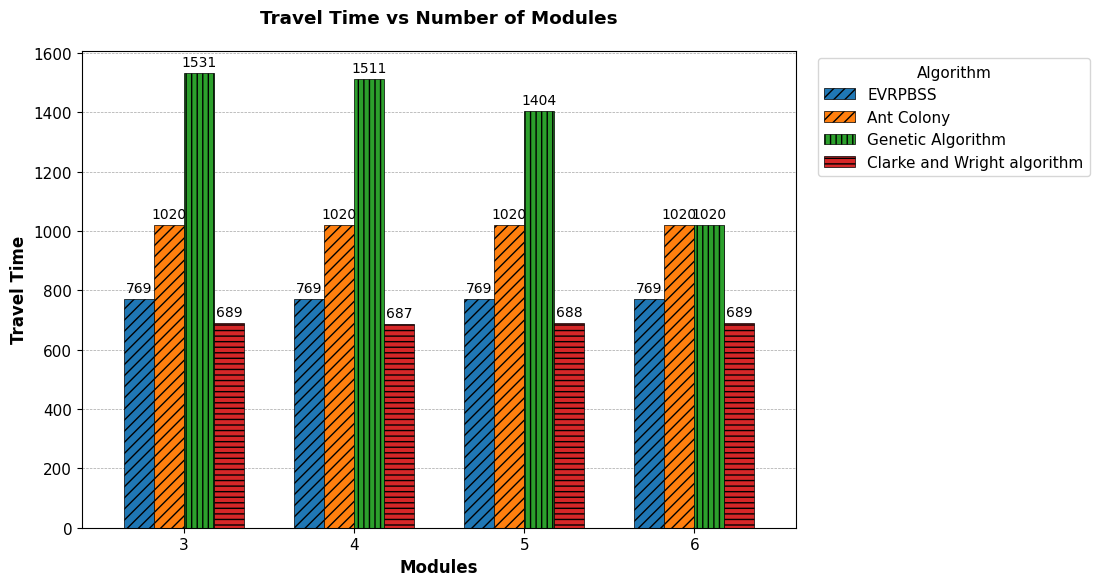

In [103]:
# Total Travel Time for Modules
fig, ax = create_grouped_bar_chart_generic(
    df_modules, 
    'Total Travel Time',
    'Modules',
    title='Travel Time vs Number of Modules',
    ylabel='Travel Time'
)
plt.show()



## (b) Energy

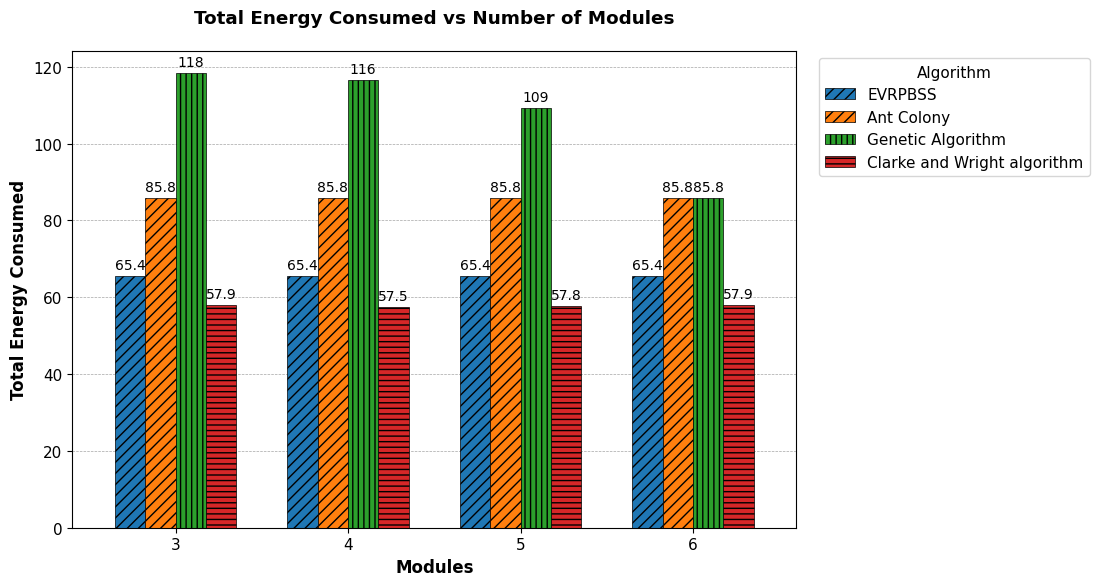

In [105]:
# Total Energy Consumed for Modules
fig, ax = create_grouped_bar_chart_generic(
    df_modules, 
    'Total Energy Consumed',
    'Modules',
    title='Total Energy Consumed vs Number of Modules',
    ylabel='Total Energy Consumed'
)
plt.show()



## (c) Distance

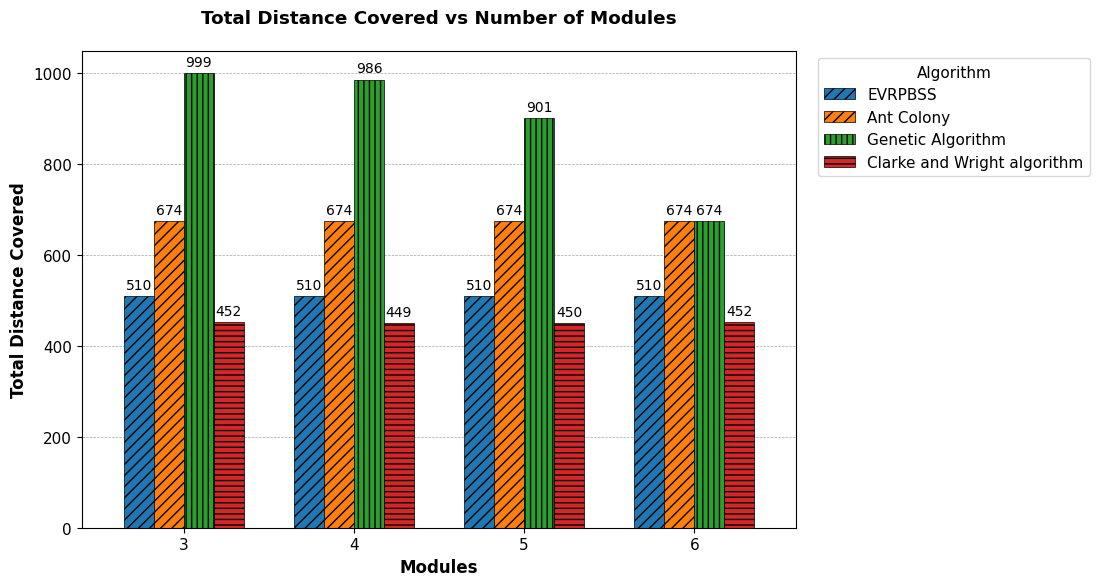

In [107]:
# Total Distance Covered for Modules
fig, ax = create_grouped_bar_chart_generic(
    df_modules, 
    'Total Distance Covered',
    'Modules',
    title='Total Distance Covered vs Number of Modules',
    ylabel='Total Distance Covered'
)
plt.show()



## (d) Module Swapped

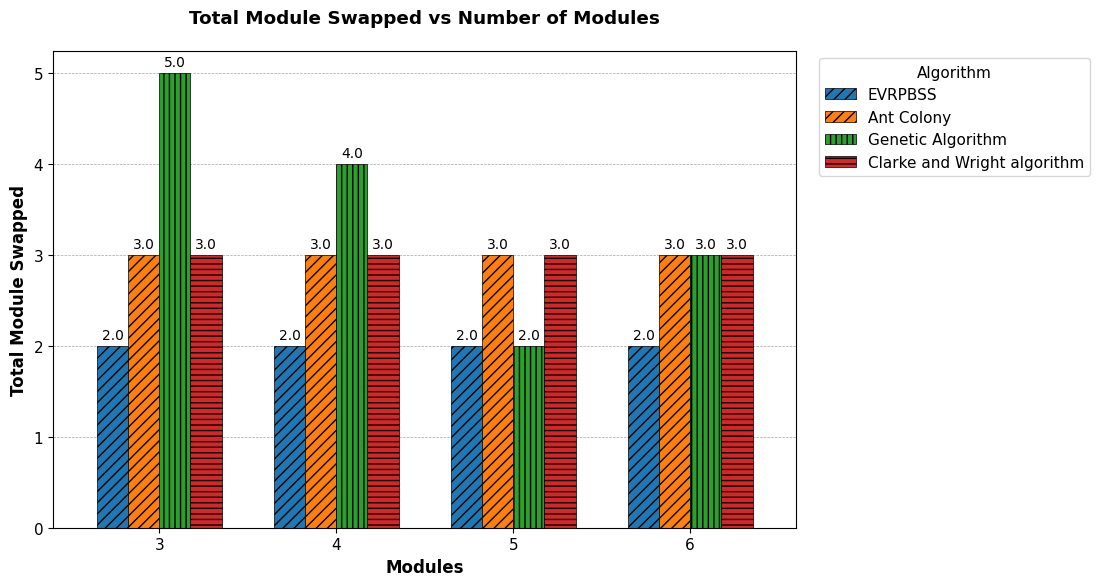

In [109]:
# Total Module Swapped for Modules
fig, ax = create_grouped_bar_chart_generic(
    df_modules, 
    'Total Module Swapped',
    'Modules',
    title='Total Module Swapped vs Number of Modules',
    ylabel='Total Module Swapped'
)
plt.show()



## (e) Execution Time

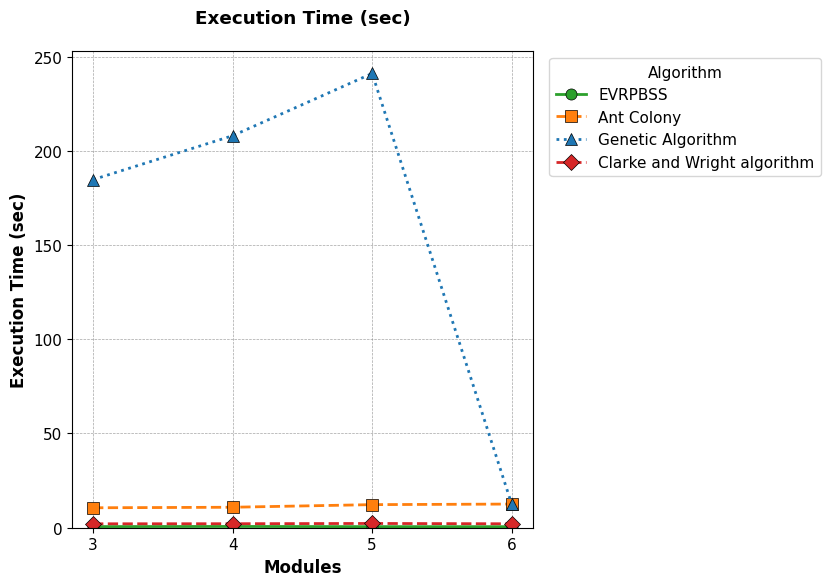

In [111]:
def create_line_chart_generic(df, metric_column, x_axis_column, title=None, ylabel=None):
    """
    Generic line chart function that works with any x-axis column.
    """
    # Handle Traffic Level special ordering
    if x_axis_column == 'Traffic Level':
        TRAFFIC_ORDER = {"Low": 1, "Mid": 2, "High": 3}
        # Get unique values and sort them by TRAFFIC_ORDER
        unique_values = df[x_axis_column].unique()
        x_values = sorted(unique_values, key=lambda x: TRAFFIC_ORDER.get(x, 999))
    else:
        x_values = sorted(df[x_axis_column].unique())
    algorithms = ['EVRPBSS', 'Ant Colony', 'Genetic Algorithm', 'Clarke and Wright algorithm']
    
    line_styles = {
        'EVRPBSS': {'color': '#2ca02c', 'marker': 'o', 'linestyle': '-', 'label': 'EVRPBSS'},
        'Ant Colony': {'color': '#ff7f0e', 'marker': 's', 'linestyle': '--', 'label': 'Ant Colony'},
        'Genetic Algorithm': {'color': '#1f77b4', 'marker': '^', 'linestyle': ':', 'label': 'Genetic Algorithm'},
        'Clarke and Wright algorithm': {'color': '#d62728', 'marker': 'D', 'linestyle': '--', 'label': 'Clarke and Wright algorithm'}
    }
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for alg in algorithms:
        values = []
        for x_val in x_values:
            value = df[(df[x_axis_column] == x_val) & (df['Algorithm'] == alg)][metric_column].values
            values.append(value[0] if len(value) > 0 else 0)
        
        style = line_styles[alg]
        ax.plot(x_values, values, 
               color=style['color'],
               marker=style['marker'],
               linestyle=style['linestyle'],
               label=style['label'],
               linewidth=2,
               markersize=8,
               markeredgecolor='black',
               markeredgewidth=0.5)
    
    ax.set_xlabel(x_axis_column, fontweight='bold')
    ax.set_ylabel(ylabel or metric_column, fontweight='bold')
    ax.set_title(title or f'{metric_column} by {x_axis_column}', 
                fontweight='bold', pad=20)
    ax.set_xticks(x_values)
    
    # Handle Traffic Level special formatting with range values
    if x_axis_column == 'Traffic Level':
        traffic_labels = {
            'Low': '0.87-1.0\nLow',
            'Mid': '0.73-0.87\nMid',
            'High': '0.6-0.73\nHigh'
        }
        x_labels = [traffic_labels.get(val, val) for val in x_values]
        ax.set_xticklabels(x_labels)
    else:
        ax.set_xticklabels(x_values)
    
    ax.legend(title='Algorithm', title_fontsize=11, fontsize=11, frameon=True, 
              loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    ax.set_ylim(bottom=0)
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make room for legend on the right
    
    return fig, ax

# Run Time for Modules - Line Chart
fig, ax = create_line_chart_generic(
    df_modules, 
    'Run Time',
    'Modules',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



## (f) Execution Time

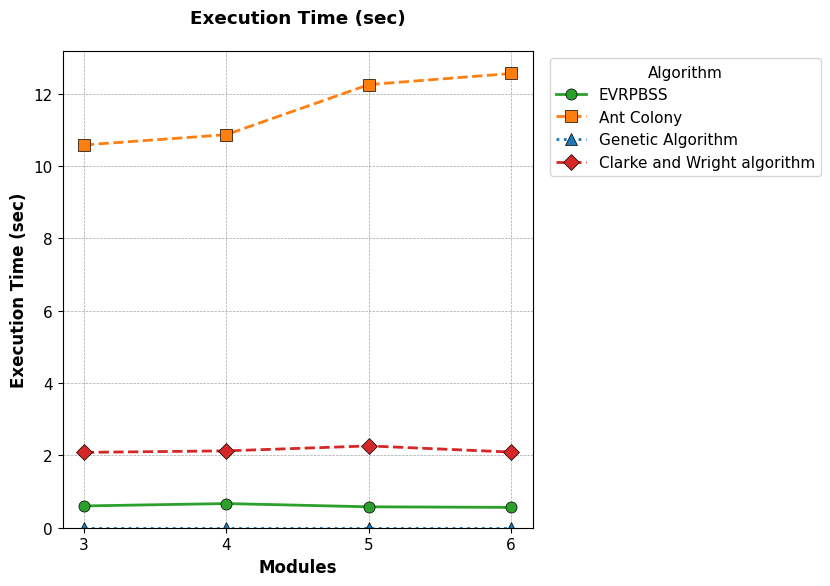

In [113]:
# Run Time for Modules - Line Chart (Without Genetic Algorithm)
df_modules_no_ga = df_modules[df_modules['Algorithm'] != 'Genetic Algorithm'].copy()
fig, ax = create_line_chart_generic(
    df_modules_no_ga, 
    'Run Time',
    'Modules',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



# MT2TE and Other Program Swap Time Change

In [115]:
# Load Swap Time Change data
df_swaptime = load_data('data_HO/swaptime', 'Swap Time (min)')
print("\n" + "="*50)
print("Swap Time Change data loaded successfully!")
print("="*50)
df_swaptime.head()



Looking for data in: c:\Users\ranji\Documents\GitHub\research-helper\data_HO\swaptime
✓ Loaded H_H&O_SwapTimeChange.csv
✓ Loaded AC_H&O_SwapTimeChange.csv
✓ Loaded GA_H&O_SwapTimeChange.csv
✓ Loaded CW_H&O_SwapTimeChange.csv

Swap Time Change data loaded successfully!


,Swap Time (min),Total Travel Time,Total Energy Consumed,Total Distance Covered,Run Time,Total Module Swapped,Algorithm
4,1,1017.01,85.816,674.60,10.878,3,Ant Colony
12,1,699.54,57.973,452.93,1.941,2,Clarke and Wright algorithm
0,1,767.79,65.427,510.34,0.617,2,EVRPBSS
8,1,1402.52,109.281,901.11,244.405,2,Genetic Algorithm
5,2,1020.01,85.816,674.60,9.992,3,Ant Colony


## (a) Total Travel Time

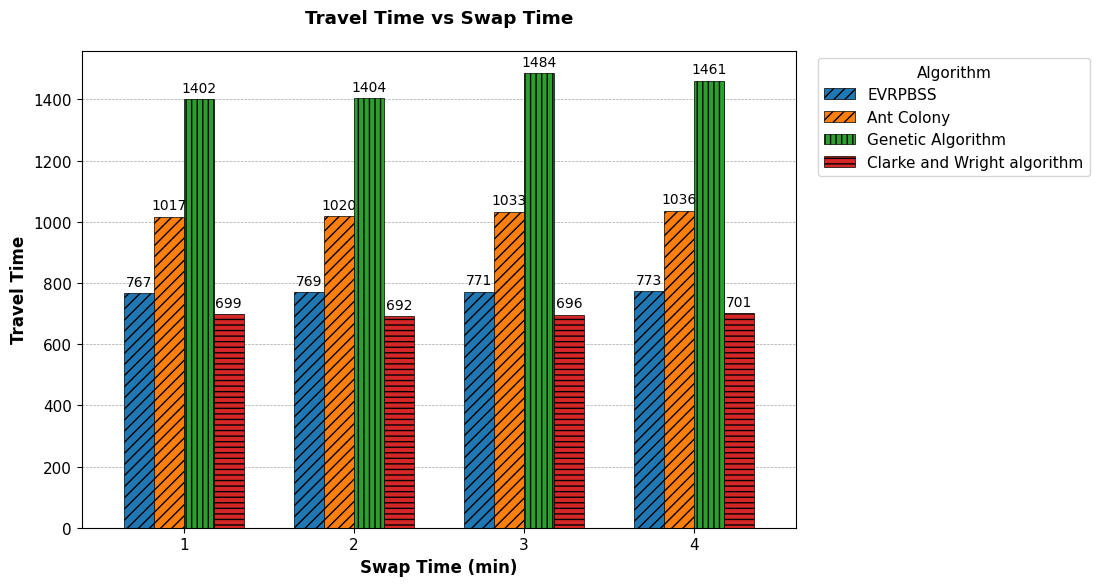

In [116]:
# Total Travel Time for Swap Time
fig, ax = create_grouped_bar_chart_generic(
    df_swaptime, 
    'Total Travel Time',
    'Swap Time (min)',
    title='Travel Time vs Swap Time',
    ylabel='Travel Time'
)
plt.show()

## (b) Energy

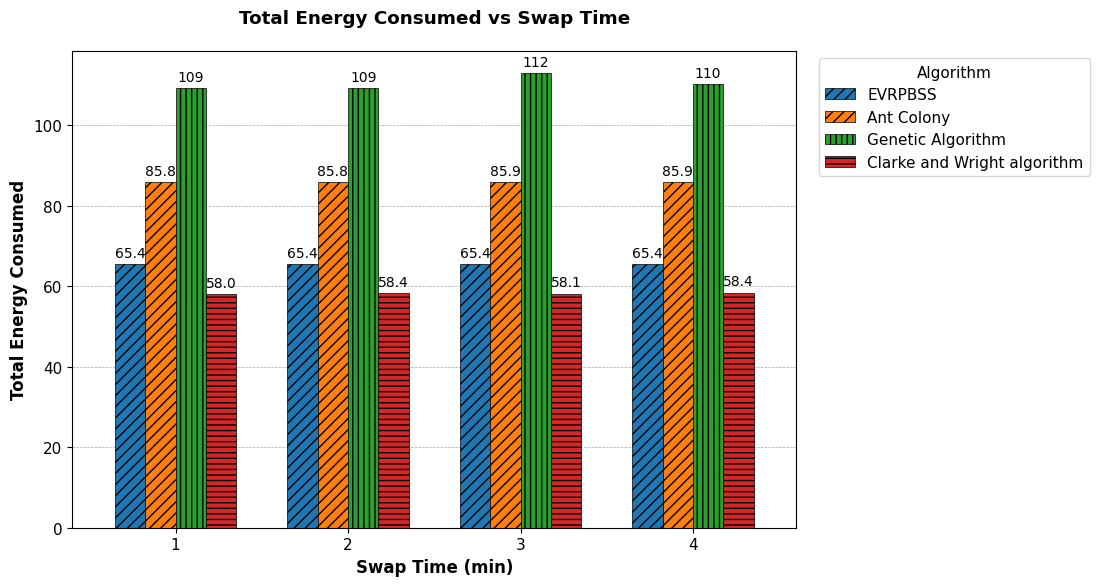

In [118]:
# Total Energy Consumed for Swap Time
fig, ax = create_grouped_bar_chart_generic(
    df_swaptime, 
    'Total Energy Consumed',
    'Swap Time (min)',
    title='Total Energy Consumed vs Swap Time',
    ylabel='Total Energy Consumed'
)
plt.show()



## (c) Distance

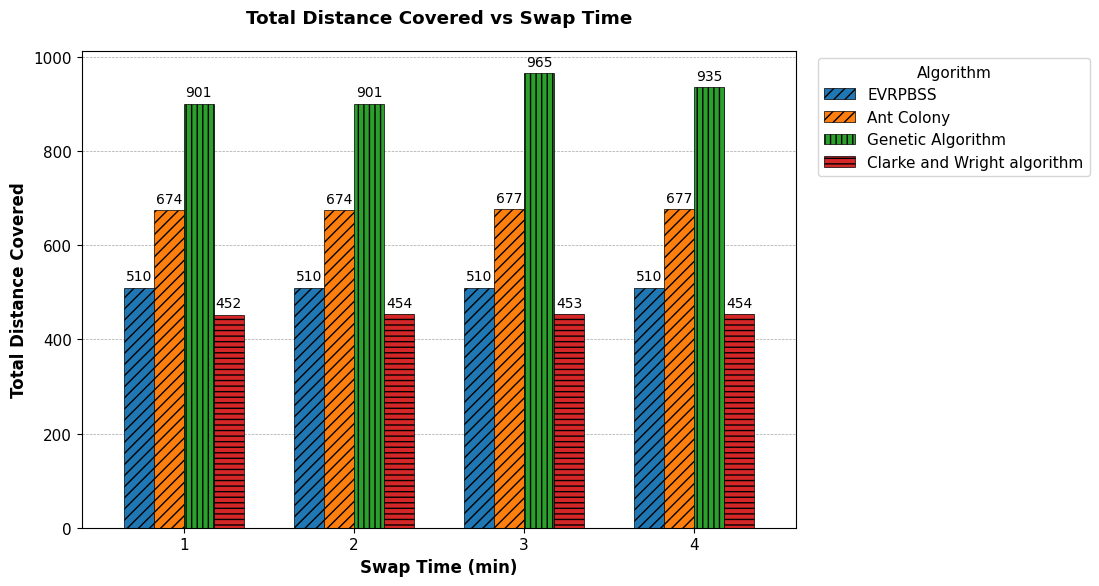

In [120]:
# Total Distance Covered for Swap Time
fig, ax = create_grouped_bar_chart_generic(
    df_swaptime, 
    'Total Distance Covered',
    'Swap Time (min)',
    title='Total Distance Covered vs Swap Time',
    ylabel='Total Distance Covered'
)
plt.show()



## (d) Total Module Swapped

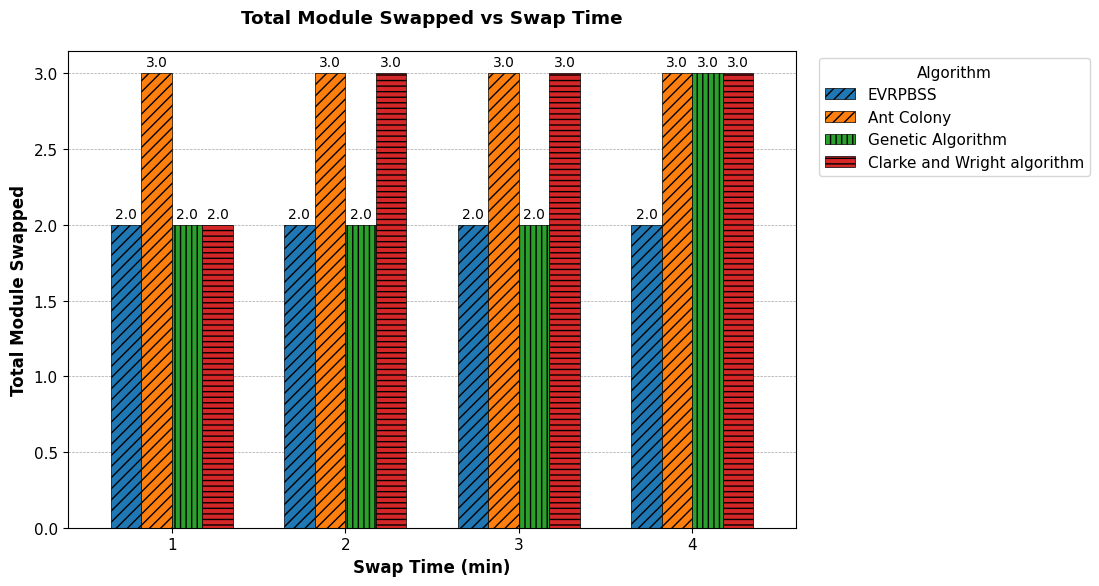

In [122]:
# Total Module Swapped for Swap Time
fig, ax = create_grouped_bar_chart_generic(
    df_swaptime, 
    'Total Module Swapped',
    'Swap Time (min)',
    title='Total Module Swapped vs Swap Time',
    ylabel='Total Module Swapped'
)
plt.show()



## (e) Execution Time

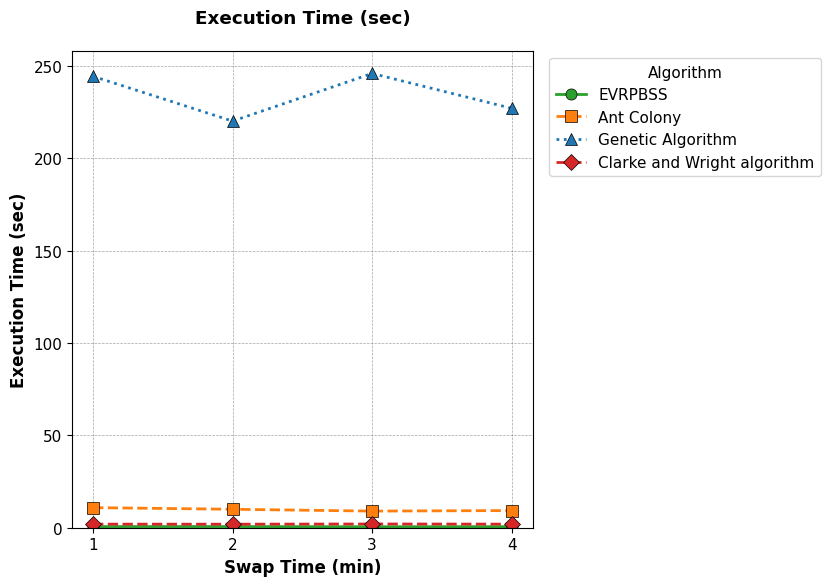

In [124]:
# Run Time for Swap Time - Line Chart
fig, ax = create_line_chart_generic(
    df_swaptime, 
    'Run Time',
    'Swap Time (min)',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



## (f) Execution Time

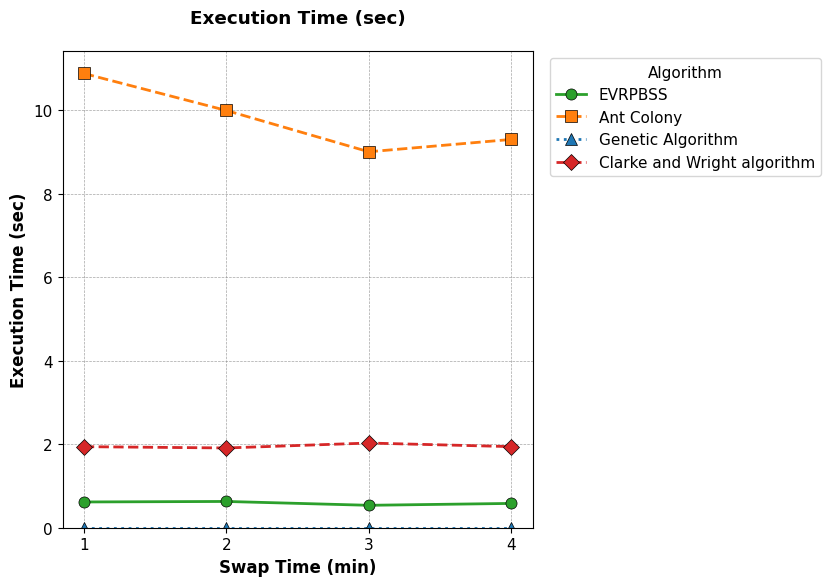

In [126]:
# Run Time for Swap Time - Line Chart (Without Genetic Algorithm)
df_swaptime_no_ga = df_swaptime[df_swaptime['Algorithm'] != 'Genetic Algorithm'].copy()
fig, ax = create_line_chart_generic(
    df_swaptime_no_ga, 
    'Run Time',
    'Swap Time (min)',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



# MT2TE and Other Program Threshold Change

In [128]:
# Load Threshold Change data
df_threshold = load_data('data_HO/Thesold', 'Threshold')
print("\n" + "="*50)
print("Threshold Change data loaded successfully!")
print("="*50)
df_threshold.head()



Looking for data in: c:\Users\ranji\Documents\GitHub\research-helper\data_HO\Thesold
✓ Loaded H_H&O_ThresholdChange.csv
✓ Loaded AC_H&O_ThresholdChange.csv
✓ Loaded GA_H&O_ThresholdChange.csv
✓ Loaded CW_H&O_ThresholdChange.csv

Threshold Change data loaded successfully!


,Threshold,Total Travel Time,Total Energy Consumed,Total Distance Covered,Run Time,Total Module Swapped,Algorithm
4,5,1020.01,85.816,674.60,10.102,3,Ant Colony
12,5,687.36,57.891,449.69,2.011,2,Clarke and Wright algorithm
0,5,769.79,65.427,510.34,0.647,2,EVRPBSS
8,5,1313.85,103.294,852.31,215.463,2,Genetic Algorithm
5,10,1020.01,85.816,674.60,9.364,3,Ant Colony


## (a) Total Travel Time

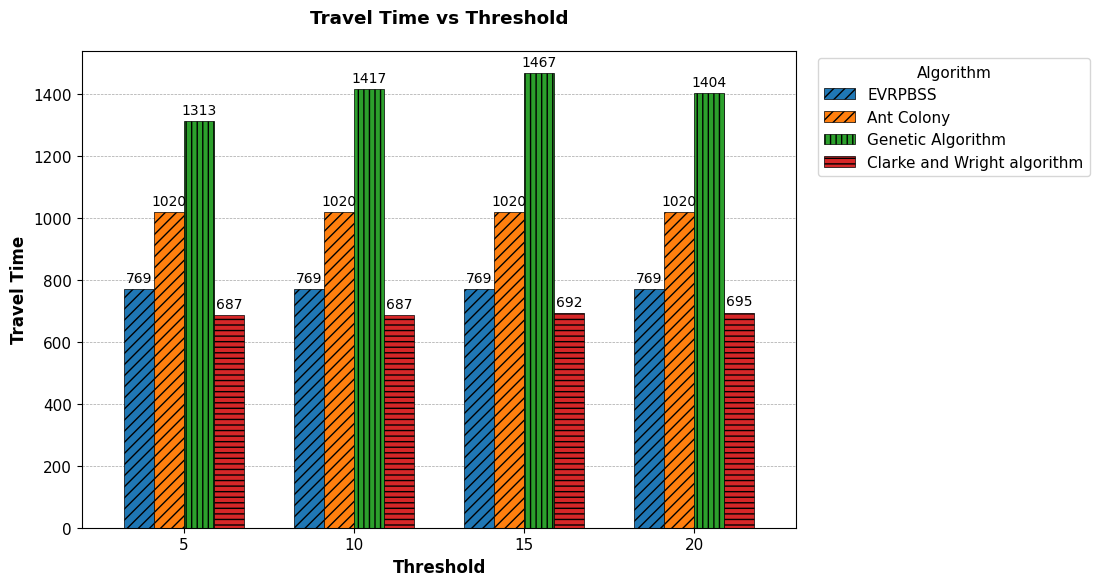

In [129]:
# Total Travel Time for Threshold
fig, ax = create_grouped_bar_chart_generic(
    df_threshold, 
    'Total Travel Time',
    'Threshold',
    title='Travel Time vs Threshold',
    ylabel='Travel Time'
)
plt.show()

## (b) Energy

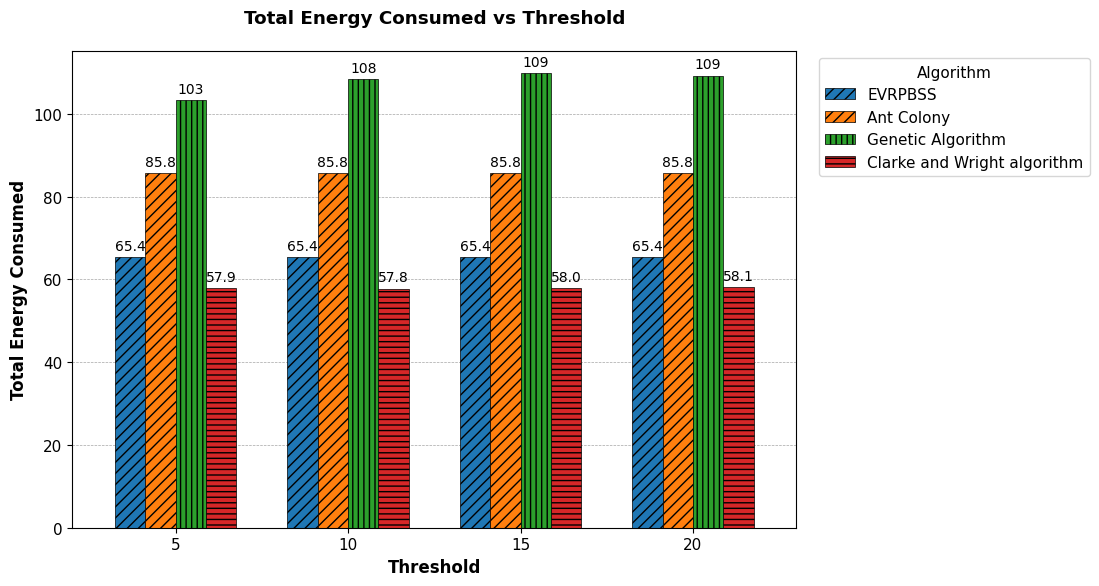

In [131]:
# Total Energy Consumed for Threshold
fig, ax = create_grouped_bar_chart_generic(
    df_threshold, 
    'Total Energy Consumed',
    'Threshold',
    title='Total Energy Consumed vs Threshold',
    ylabel='Total Energy Consumed'
)
plt.show()



## (c) Distance

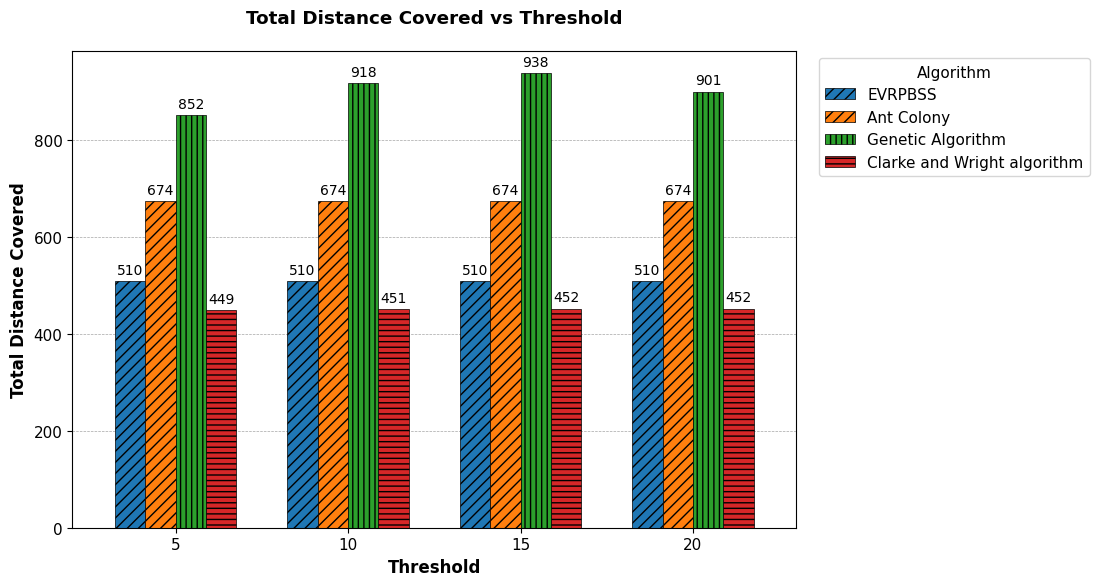

In [133]:
# Total Distance Covered for Threshold
fig, ax = create_grouped_bar_chart_generic(
    df_threshold, 
    'Total Distance Covered',
    'Threshold',
    title='Total Distance Covered vs Threshold',
    ylabel='Total Distance Covered'
)
plt.show()



## (d) Module Swapped

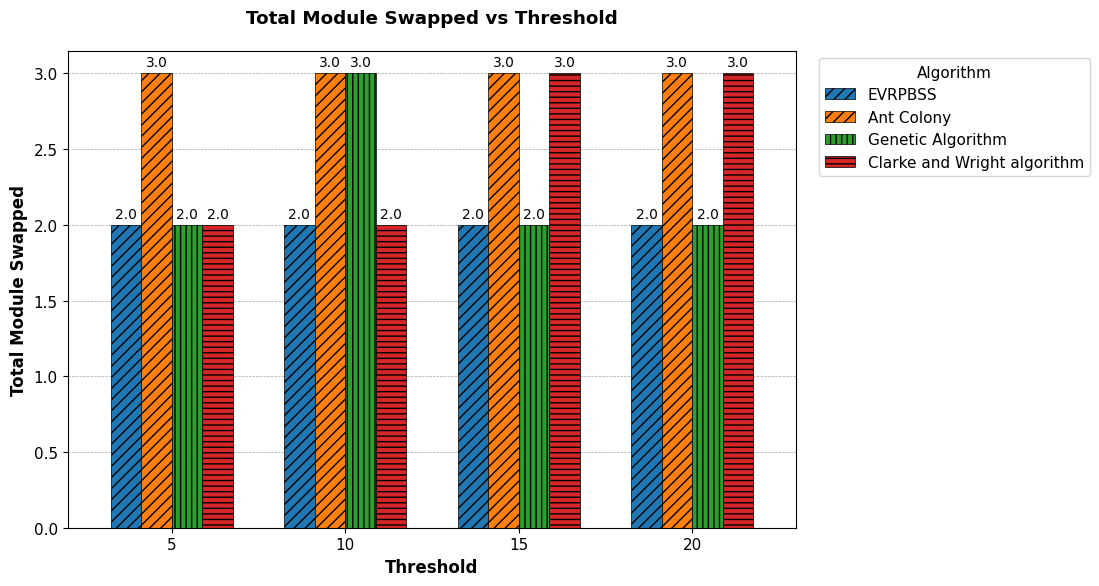

In [135]:
# Total Module Swapped for Threshold
fig, ax = create_grouped_bar_chart_generic(
    df_threshold, 
    'Total Module Swapped',
    'Threshold',
    title='Total Module Swapped vs Threshold',
    ylabel='Total Module Swapped'
)
plt.show()



## (e) Execution Time

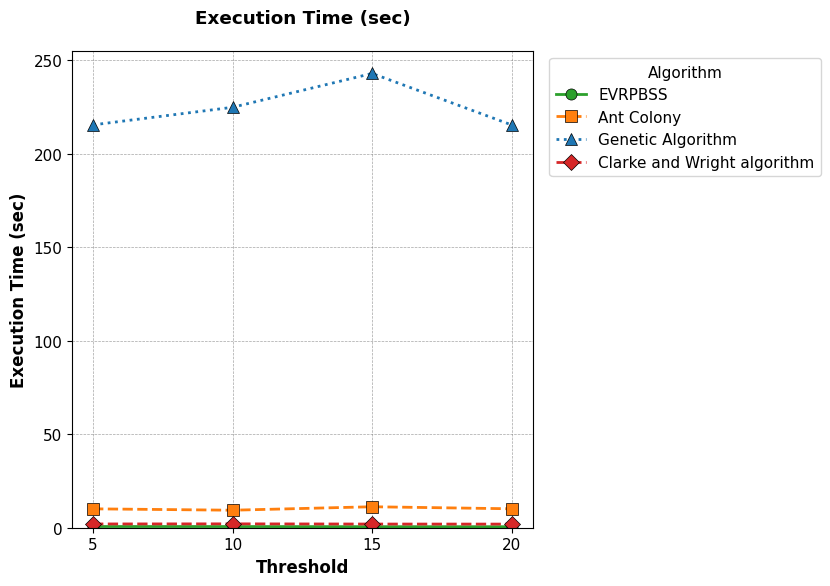

In [137]:
# Run Time for Threshold - Line Chart
fig, ax = create_line_chart_generic(
    df_threshold, 
    'Run Time',
    'Threshold',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



## (f) Execution Time

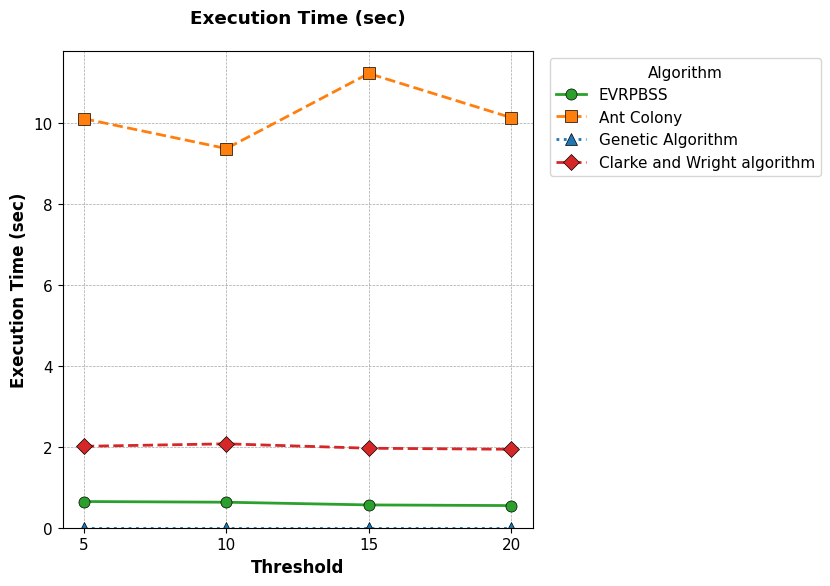

In [139]:
# Run Time for Threshold - Line Chart (Without Genetic Algorithm)
df_threshold_no_ga = df_threshold[df_threshold['Algorithm'] != 'Genetic Algorithm'].copy()
fig, ax = create_line_chart_generic(
    df_threshold_no_ga, 
    'Run Time',
    'Threshold',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



# MT2TE and Other Program Traffic

In [141]:
# Load Traffic data
df_traffic = load_data('data_HO/Traffic', 'Traffic Level')
print("\n" + "="*50)
print("Traffic data loaded successfully!")
print("="*50)
df_traffic.head()


Looking for data in: c:\Users\ranji\Documents\GitHub\research-helper\data_HO\Traffic
✓ Loaded H_H&O_Traffic.csv
✓ Loaded AC_H&O_Traffic.csv
✓ Loaded GA_H&O_Traffic.csv
✓ Loaded CW_H&O_Traffic.csv

Traffic data loaded successfully!


,Traffic Level,Total Travel Time,Total Energy Consumed,Total Distance Covered,Run Time,Total Module Swapped,Algorithm
5,High,1278.51,83.513,703.74,11.777,4,Ant Colony
11,High,819.36,53.479,449.79,1.964,3,Clarke and Wright algorithm
2,High,899.80,59.212,499.97,0.540,2,EVRPBSS
8,High,1653.33,100.486,908.28,228.828,4,Genetic Algorithm
3,Low,941.87,98.477,728.25,10.593,4,Ant Colony


## (a) Travel Time

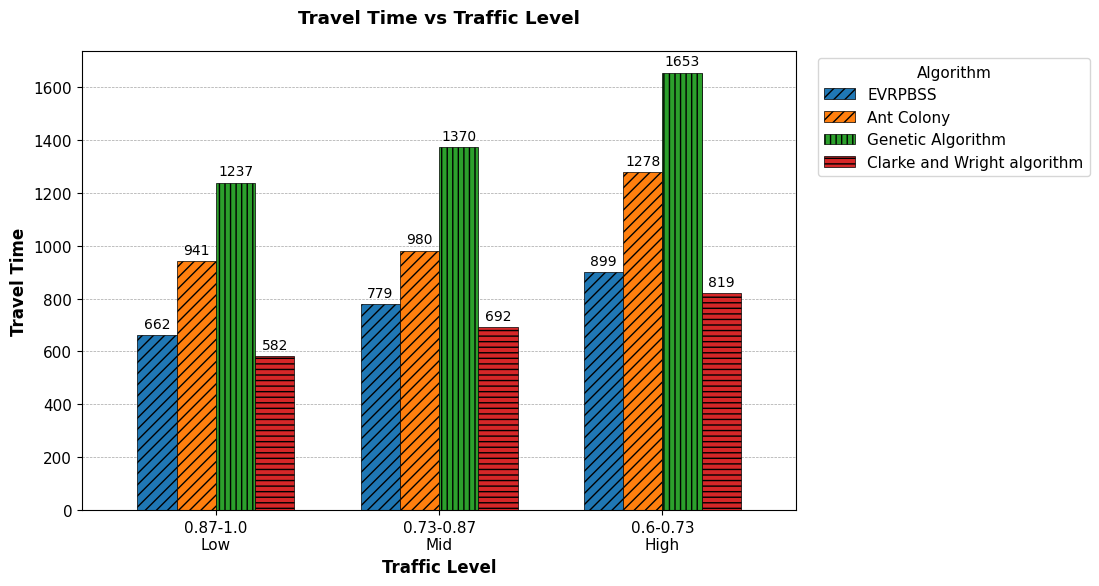

In [142]:
# Total Travel Time for Traffic
# Note: Traffic Level ordering (Low, Mid, High) is handled automatically by create_grouped_bar_chart_generic
fig, ax = create_grouped_bar_chart_generic(
    df_traffic, 
    'Total Travel Time',
    'Traffic Level',
    title='Travel Time vs Traffic Level',
    ylabel='Travel Time'
)
plt.show()

## (b) Energy

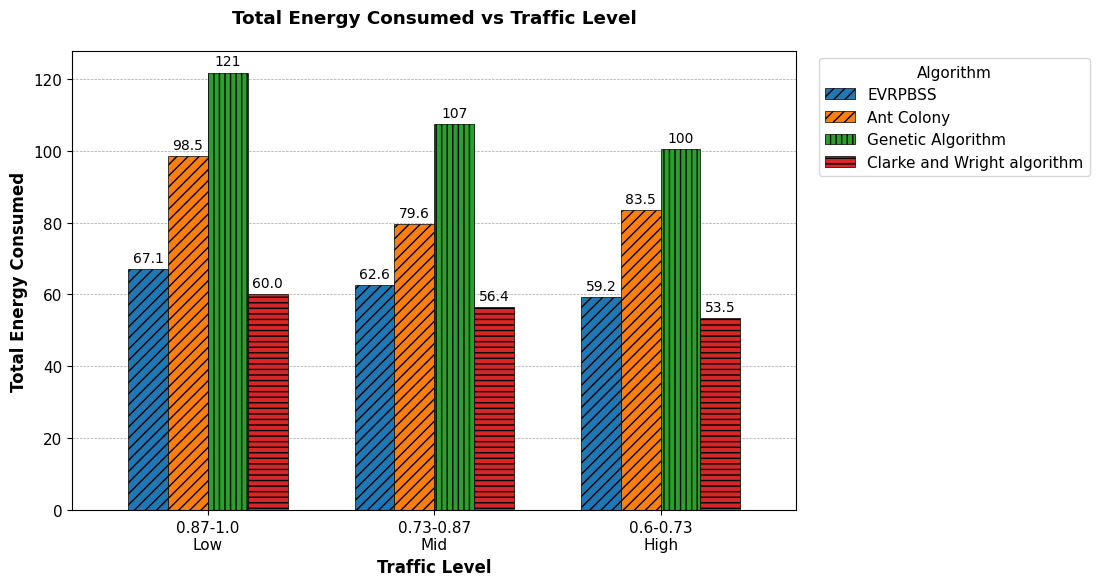

In [144]:
# Total Energy Consumed for Traffic
fig, ax = create_grouped_bar_chart_generic(
    df_traffic, 
    'Total Energy Consumed',
    'Traffic Level',
    title='Total Energy Consumed vs Traffic Level',
    ylabel='Total Energy Consumed'
)
plt.show()



## (c) Distance

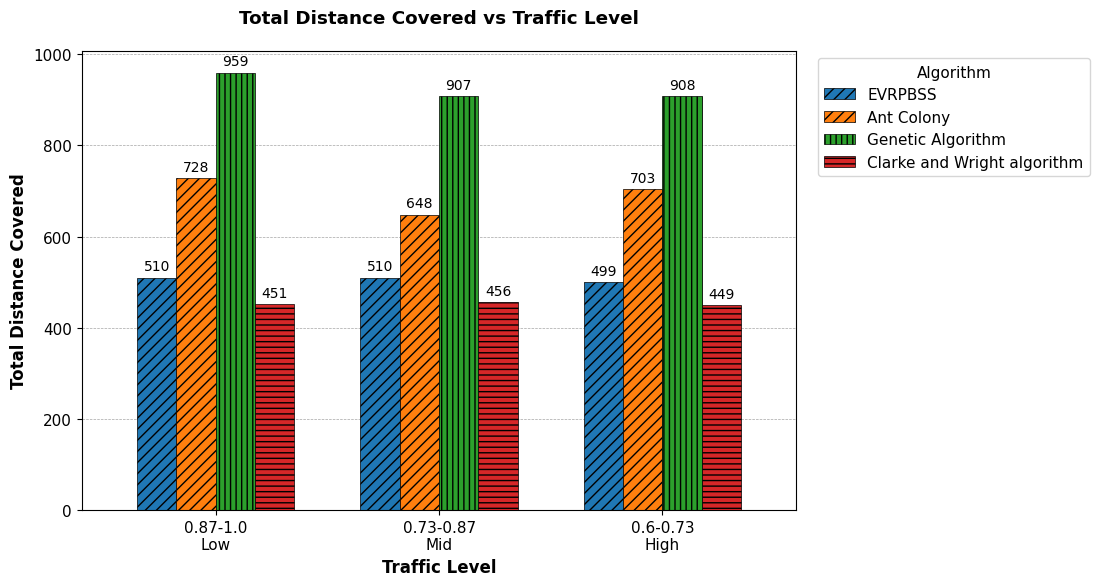

In [146]:
# Total Distance Covered for Traffic
fig, ax = create_grouped_bar_chart_generic(
    df_traffic, 
    'Total Distance Covered',
    'Traffic Level',
    title='Total Distance Covered vs Traffic Level',
    ylabel='Total Distance Covered'
)
plt.show()



## (d) Total Module Swapped

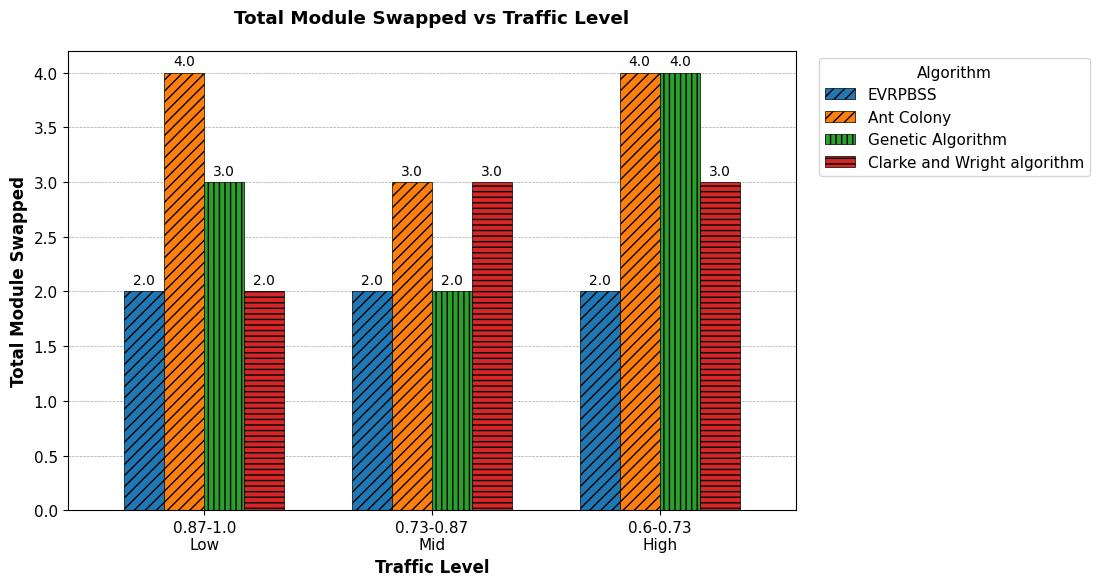

In [148]:
# Total Module Swapped for Traffic
fig, ax = create_grouped_bar_chart_generic(
    df_traffic, 
    'Total Module Swapped',
    'Traffic Level',
    title='Total Module Swapped vs Traffic Level',
    ylabel='Total Module Swapped'
)
plt.show()



## (e) Execution Time

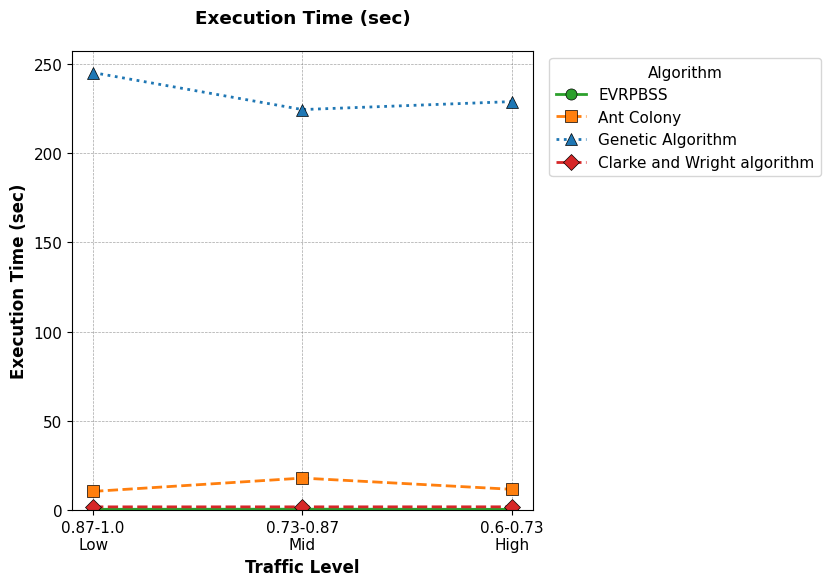

In [150]:
# Run Time for Traffic - Line Chart
fig, ax = create_line_chart_generic(
    df_traffic, 
    'Run Time',
    'Traffic Level',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



## (f) Execution Time

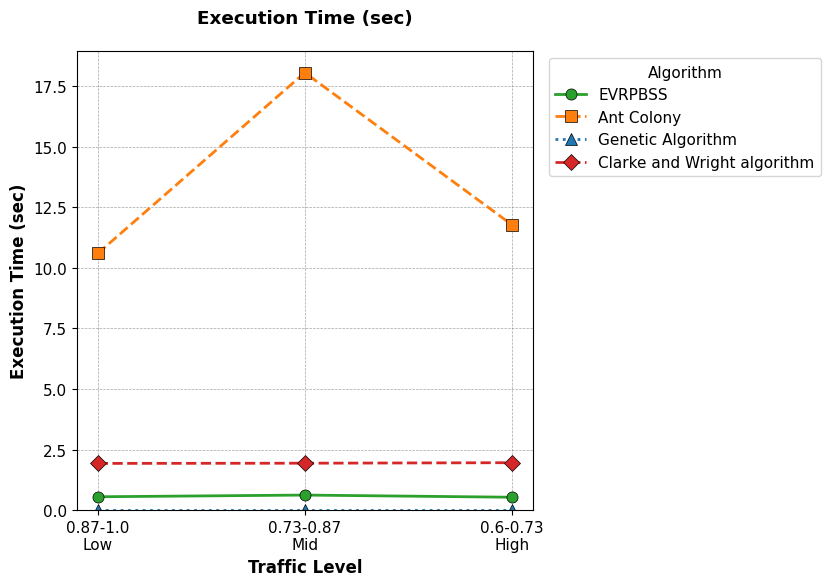

In [152]:
# Run Time for Traffic - Line Chart (Without Genetic Algorithm)
df_traffic_no_ga = df_traffic[df_traffic['Algorithm'] != 'Genetic Algorithm'].copy()
fig, ax = create_line_chart_generic(
    df_traffic_no_ga, 
    'Run Time',
    'Traffic Level',
    title='Execution Time (sec)',
    ylabel='Execution Time (sec)'
)
plt.show()



Real Time Sumo

In [154]:
# Load SUMO data
base_path = Path.cwd()
if base_path.name == 'viz':
    base_path = base_path.parent

# Load Threshold data
df_threshold = pd.read_csv(base_path / 'data_sumo' / 'Threshold_summary.csv')
# Rename 'Travel Time' to 'Total Travel Time' for consistency
if 'Travel Time' in df_threshold.columns:
    df_threshold = df_threshold.rename(columns={'Travel Time': 'Total Travel Time'})

# Load Swap Time data
df_swaptime = pd.read_csv(base_path / 'data_sumo' / 'swaptime.csv')

# Load Module Change data
df_modulechange = pd.read_csv(base_path / 'data_sumo' / 'ModuleChange_summary.csv')

print("Threshold Data:")
print(df_threshold)
print("\nSwap Time Data:")
print(df_swaptime)
print("\nModule Change Data:")
print(df_modulechange)


Threshold Data:
   Threshold  Total Travel Time  Total Energy Consumed  \
0          5              86.63                 12.591   
1         10              89.94                 12.957   
2         15              92.25                 13.171   
3         20              89.22                 12.930   

   Total Distance Covered  Run Time  Total Module Swapped  
0                   60.06   547.790                     0  
1                   62.88   546.379                     0  
2                   63.76   568.650                     0  
3                   61.70   553.994                     0  

Swap Time Data:
   Swap Time (min)  Total Travel Time  Total Energy Consumed  \
0                1              89.94                 12.922   
1                2              89.22                 12.930   
2                3              89.29                 12.575   
3                4              92.84                 13.178   

   Total Distance Covered  Run Time  Total Module Swapp

In [155]:
def create_simple_bar_chart(df, x_column, y_column, title=None, ylabel=None, width=0.8):
    """
    Create a simple bar chart for SUMO data (single series, no algorithms).
    
    Parameters:
    -----------
    df : DataFrame
        Data with x_column and y_column
    x_column : str
        Name of the x-axis column
    y_column : str
        Name of the y-axis column to plot
    title : str, optional
        Chart title
    ylabel : str, optional
        Y-axis label (default: y_column)
    width : float, optional
        Width of bars (default: 0.8, use 0.4-0.5 for thinner bars)
    """
    # Sort by x_column
    df_sorted = df.sort_values(x_column)
    x_values = df_sorted[x_column].values
    y_values = df_sorted[y_column].values
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars with specified width
    bars = ax.bar(x_values, y_values, 
                  width=width,
                  color='#1f77b4',  # Blue color
                  edgecolor='black', 
                  linewidth=0.5)
    
    # Add value labels on top of bars
    for bar, val in zip(bars, y_values):
        height = bar.get_height()
        # Format value based on magnitude
        if val < 10:
            label_text = f'{val:.2f}'
        elif val < 100:
            label_text = f'{val:.1f}'
        else:
            label_text = f'{int(val)}'
        ax.text(bar.get_x() + bar.get_width()/2., height,
               label_text,
               ha='center', va='bottom',
               fontsize=10, fontweight='normal')
    
    # Customize axes
    ax.set_xlabel(x_column, fontweight='bold')
    ax.set_ylabel(ylabel or y_column, fontweight='bold')
    if title:
        ax.set_title(title, fontweight='bold', pad=20)
    else:
        ax.set_title(f'{y_column} vs {x_column}', fontweight='bold', pad=20)
    
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values)
    
    # Calculate smart y-axis range to make differences visible
    y_min = min(y_values)
    y_max = max(y_values)
    y_range = y_max - y_min
    if y_min > 0 and y_range > 0:
        if y_min > y_range * 0.5:
            y_bottom = max(0, y_min * 0.95)
        else:
            y_bottom = max(0, y_min - (y_range * 0.1))
        ax.set_ylim(bottom=y_bottom, top=y_max * 1.05)
    else:
        ax.set_ylim(bottom=0, top=y_max * 1.05)
    
    # Add grid
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    return fig, ax


# Real Time Sumo Threshold

## (a) Travel Time

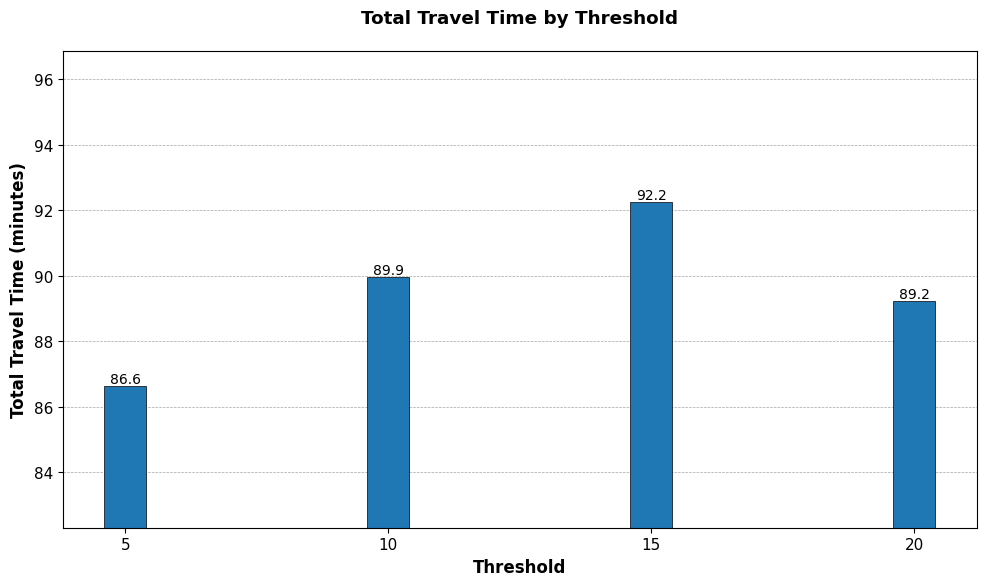

In [157]:
# Threshold - Total Travel Time
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Total Travel Time',
    title='Total Travel Time by Threshold',
    ylabel='Total Travel Time (minutes)'
)
plt.show()


## (b) Energy

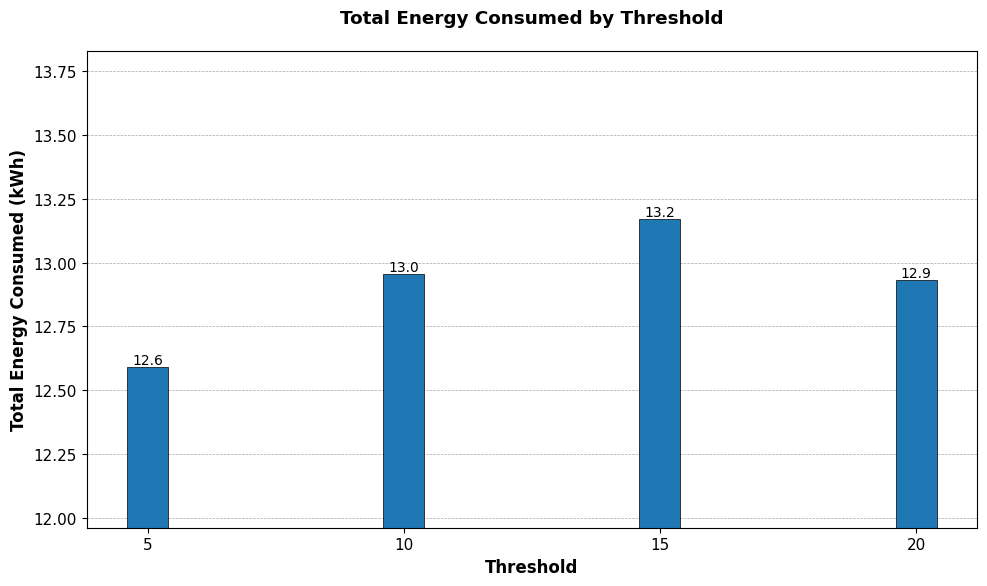

In [159]:
# Threshold - Total Energy Consumed
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Total Energy Consumed',
    title='Total Energy Consumed by Threshold',
    ylabel='Total Energy Consumed (kWh)'
)
plt.show()


## (c) Distance

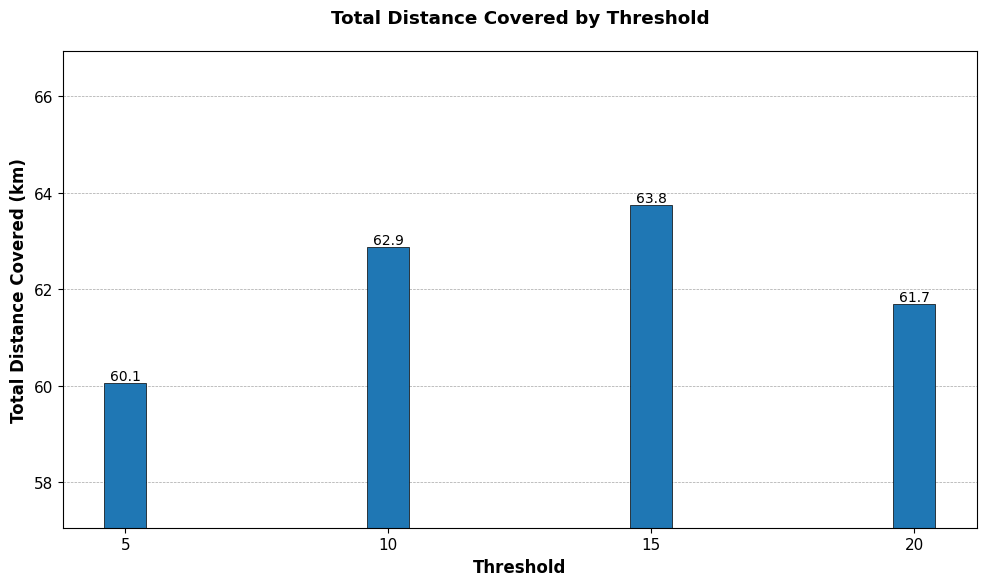

In [161]:
# Threshold - Total Distance Covered
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Total Distance Covered',
    title='Total Distance Covered by Threshold',
    ylabel='Total Distance Covered (km)'
)
plt.show()


## (d) runtime

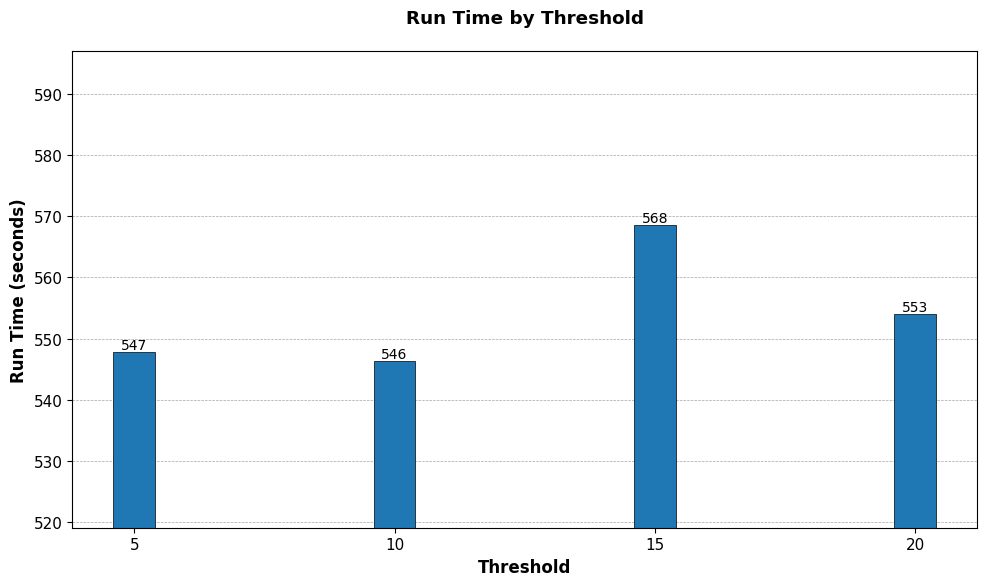

In [163]:
# Threshold - Run Time
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Run Time',
    title='Run Time by Threshold',
    ylabel='Run Time (seconds)'
)
plt.show()


# Real Time Sumo Swap Time

## (a) Travel Time

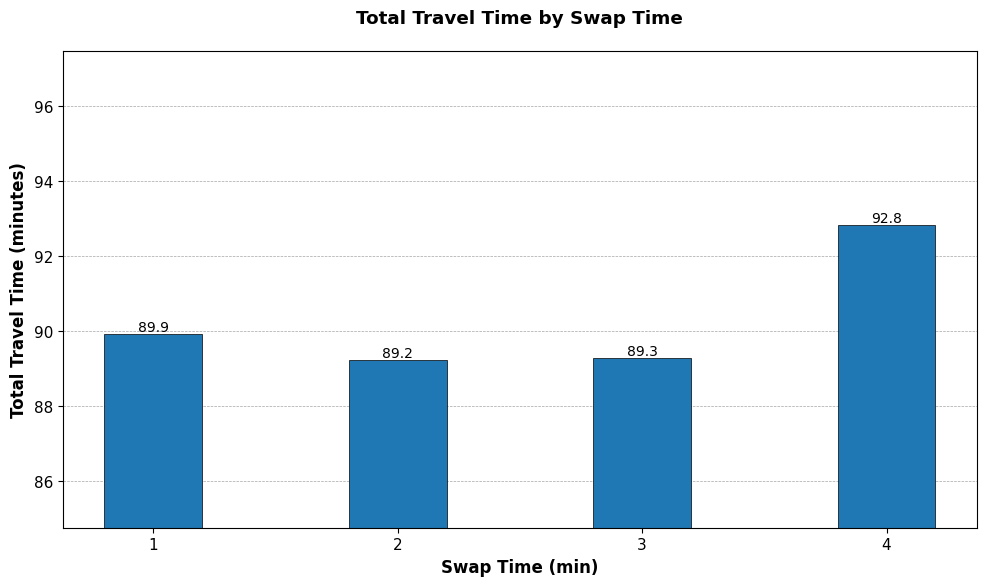

In [165]:
# Swap Time - Total Travel Time
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Total Travel Time',
    title='Total Travel Time by Swap Time',
    ylabel='Total Travel Time (minutes)',
    width=0.4
)
plt.show()


## (b) energy

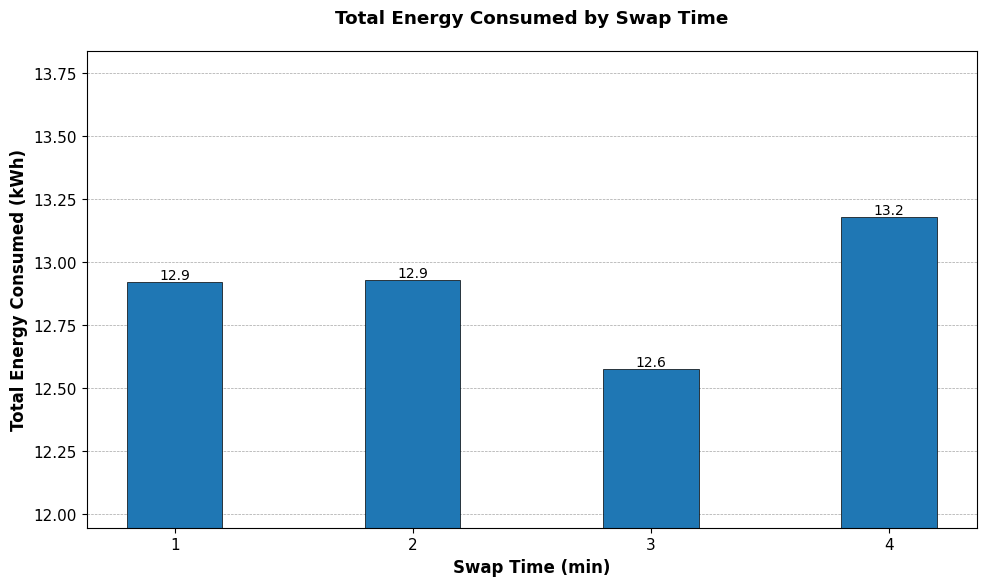

In [167]:
# Swap Time - Total Energy Consumed
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Total Energy Consumed',
    title='Total Energy Consumed by Swap Time',
    ylabel='Total Energy Consumed (kWh)',
    width=0.4
)
plt.show()


## (c) Distance

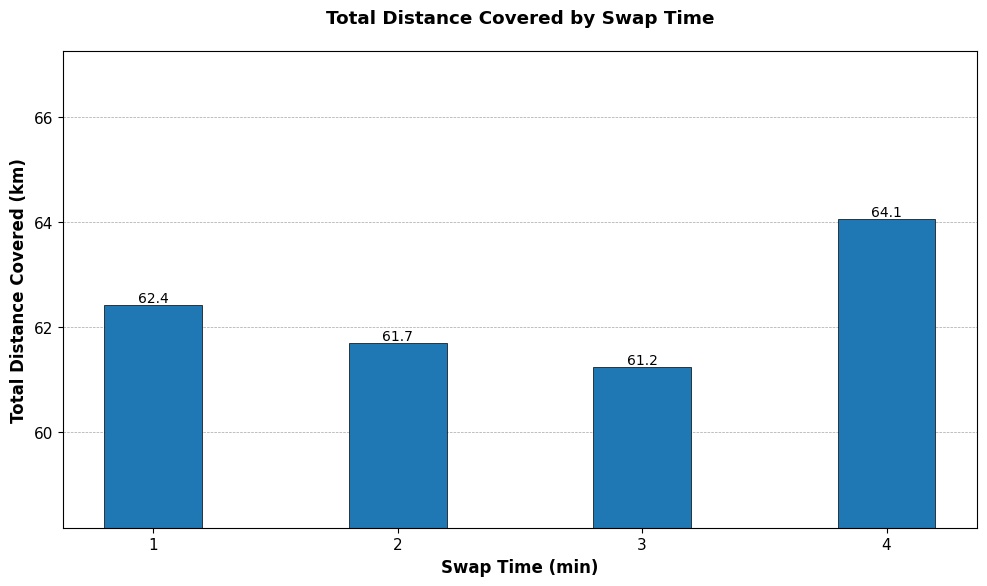

In [169]:
# Swap Time - Total Distance Covered
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Total Distance Covered',
    title='Total Distance Covered by Swap Time',
    ylabel='Total Distance Covered (km)',
    width=0.4
)
plt.show()


## (d) Runtime

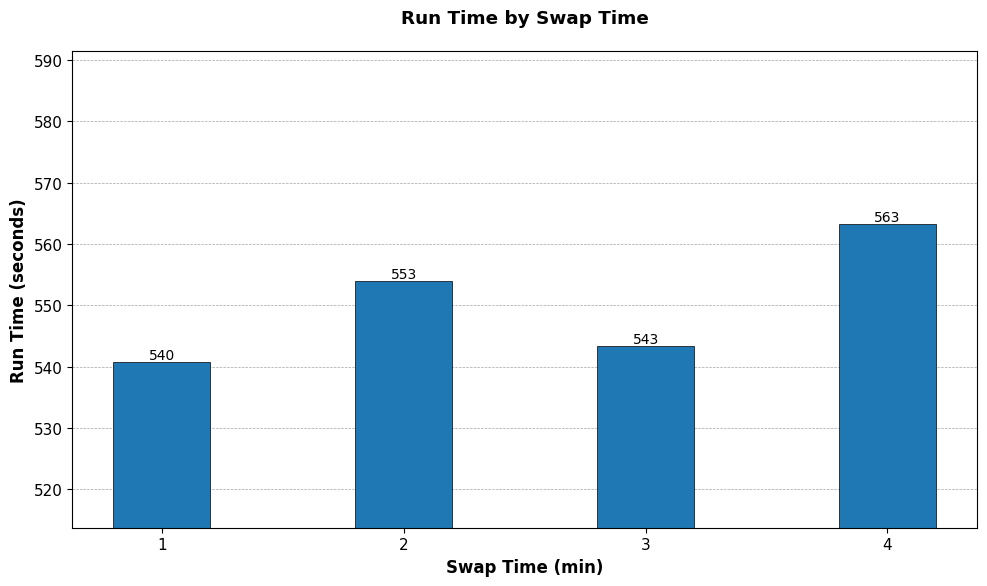

In [171]:
# Swap Time - Run Time
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Run Time',
    title='Run Time by Swap Time',
    ylabel='Run Time (seconds)',
    width=0.4
)
plt.show()


# Real Time Sumo Module Change


## (a) Travel Time

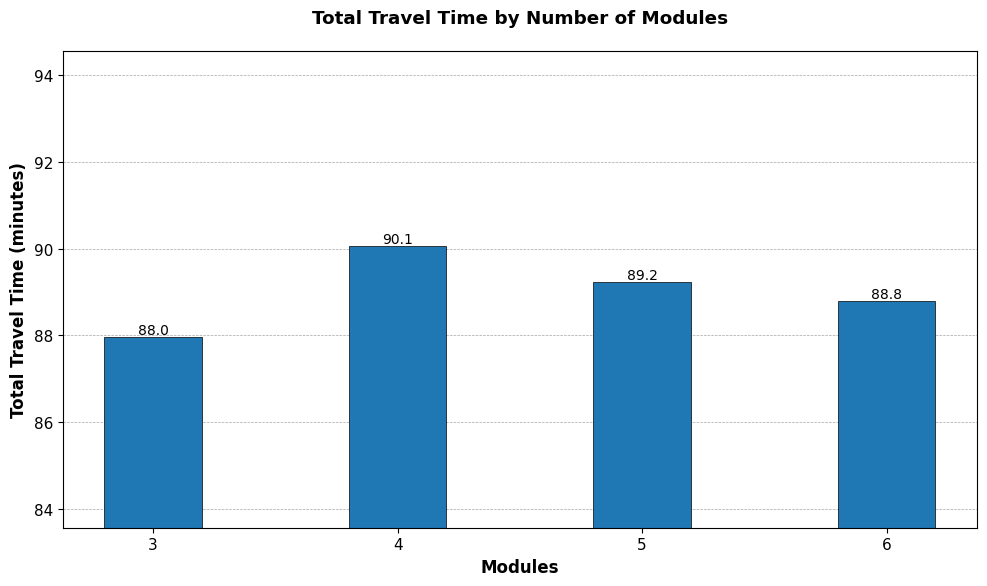

In [173]:
# Module Change - Total Travel Time
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Total Travel Time',
    title='Total Travel Time by Number of Modules',
    ylabel='Total Travel Time (minutes)',
    width=0.4
)
plt.show()


## (b) energy

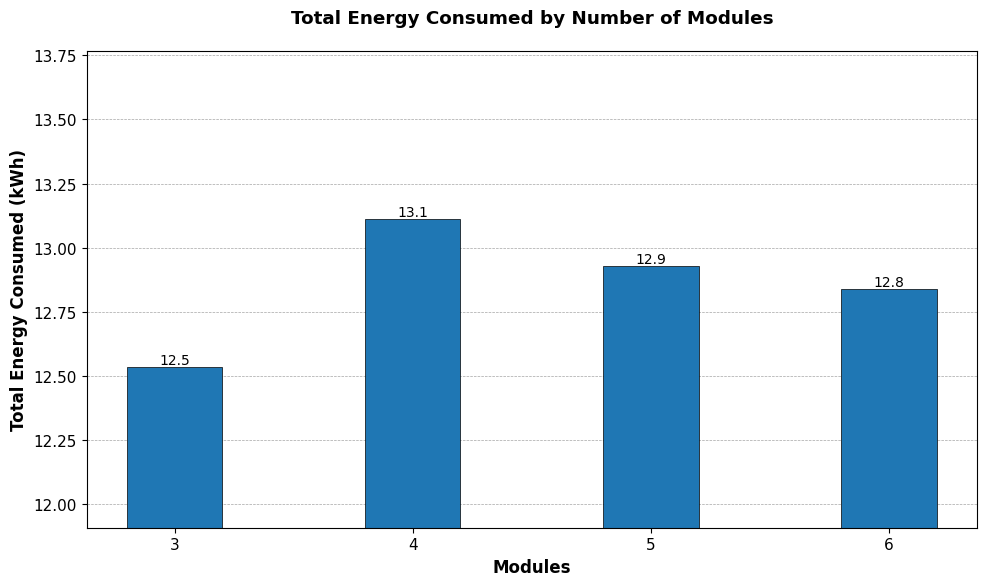

In [175]:
# Module Change - Total Energy Consumed
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Total Energy Consumed',
    title='Total Energy Consumed by Number of Modules',
    ylabel='Total Energy Consumed (kWh)',
    width=0.4
)
plt.show()


## (c) Distance

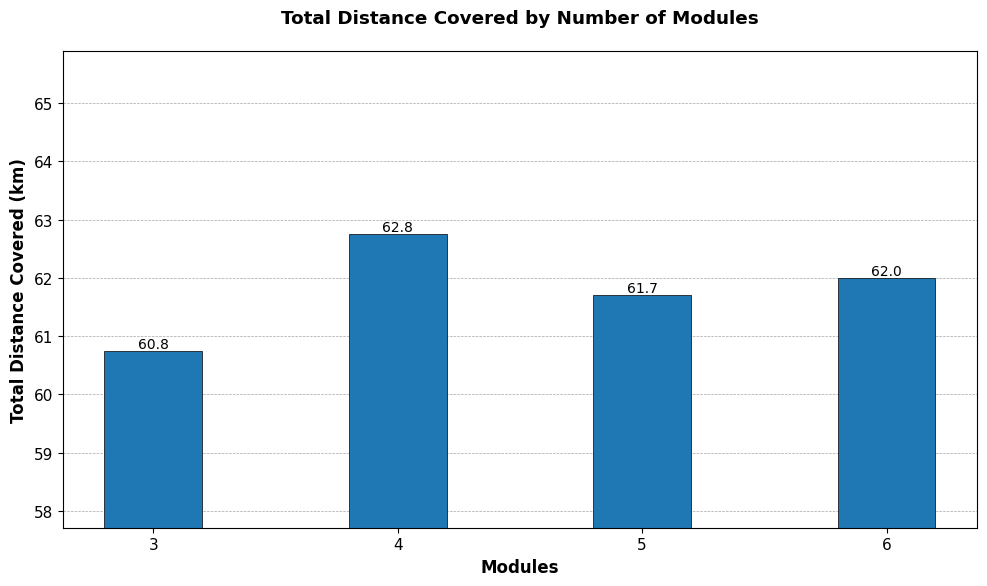

In [177]:
# Module Change - Total Distance Covered
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Total Distance Covered',
    title='Total Distance Covered by Number of Modules',
    ylabel='Total Distance Covered (km)',
    width=0.4
)
plt.show()


## (d) Run time

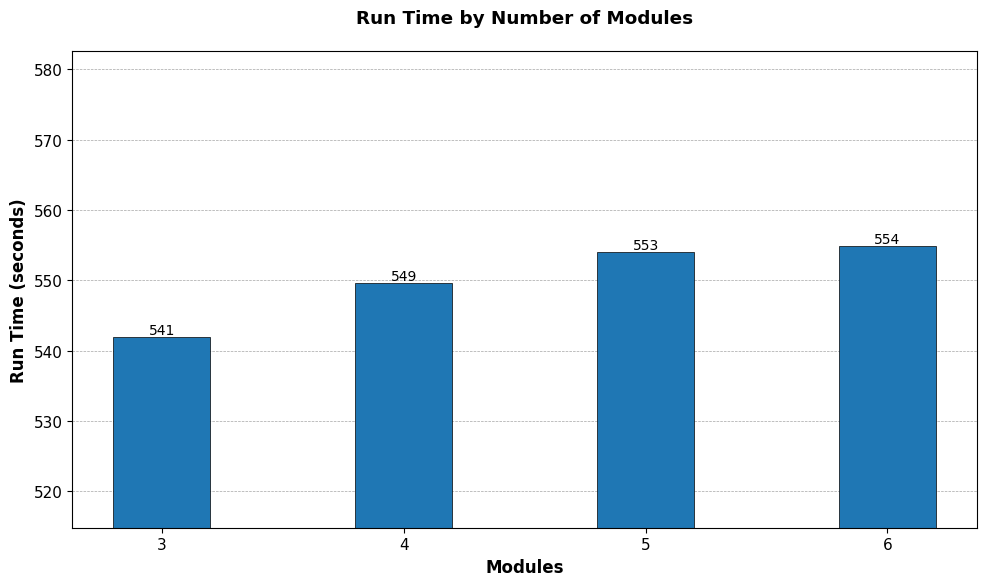

In [179]:
# Module Change - Run Time
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Run Time',
    title='Run Time by Number of Modules',
    ylabel='Run Time (seconds)',
    width=0.4
)
plt.show()
